# New York City (NYC) Airbnb Listings Segmentation using RFM Analysis


## Import module & Airbnb data set

In [ ]:
# Importing necessery library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
#Importing data set
sheet_url_listings ='https://docs.google.com/spreadsheets/d/1DywumeadnPPgbg3inY7x1EVydnWI0wRFgUSB6Rn6cYs/edit#gid=559462745'
sheet_url_trf_listings = sheet_url_listings.replace('/edit#gid=', '/export?format=csv&gid=')
raw_data = pd.read_csv(sheet_url_trf_listings)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (34) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
raw_data_copy = raw_data.copy()

In [ ]:
raw_data.head()

id                                      name  \
0  2595.0                     Skylit Midtown Castle   
1  5121.0                           BlissArtsSpace!   
2  5136.0  Spacious Brooklyn Duplex, Patio + Garden   
3  5178.0           Large Furnished Room Near B'way   
4  5203.0        Cozy Clean Guest Room - Family Apt   

                                         description  \
0  Beautiful, spacious skylit studio in the heart...   
1  One room available for rent in a 2 bedroom apt...   
2  We welcome you to stay in our lovely 2 br dupl...   
3  Please don’t expect the luxury here just a bas...   
4  Our best guests are seeking a safe, clean, spa...   

                               neighborhood_overview  host_id  host_name  \
0  Centrally located in the heart of Manhattan ju...     2845   Jennifer   
1                                                NaN     7356      Garon   
2                                                NaN     7378    Rebecca   
3    Theater district, many restaurants around here.     8967   Shunichi   
4  Our neighborhood is full of restaurants and ca...     7490  MaryEllen   

   host_response_time host_response_rate host_acceptance_rate  \
0  a few days or more                39%                  19%   
1      within an hour               100%                 100%   
2      within an hour               100%                  50%   
3        within a day               100%                 100%   
4                 NaN                NaN                  NaN   

  host_is_superhost  ... minimum_nights number_of_reviews  last_review  \
0                 f  ...             30                48    11/4/2019   
1                 f  ...             30                50    12/2/2019   
2                 f  ...             21                 2     8/8/2021   
3                 f  ...              2               536     5/9/2022   
4                 f  ...              2               118    7/21/2017   

   reviews_per_month calculated_host_listings_count  availability_365  \
0               0.31                              3               308   
1               0.32                              2               365   
2               0.02                              1               250   
3               3.37                              1               172   
4               0.76                              1                 0   

  number_of_reviews_ltm  license        country  zipcode  
0                     0      NaN  United States  10018.0  
1                     0      NaN  United States  11216.0  
2                     1      NaN  United States  11220.0  
3                    62      NaN  United States  10019.0  
4                     0      NaN  United States  10025.0  

[5 rows x 37 columns]

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37410 entries, 0 to 37409
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              37410 non-null  float64
 1   name                            37396 non-null  object 
 2   description                     36523 non-null  object 
 3   neighborhood_overview           22430 non-null  object 
 4   host_id                         37410 non-null  int64  
 5   host_name                       37344 non-null  object 
 6   host_response_time              24200 non-null  object 
 7   host_response_rate              24200 non-null  object 
 8   host_acceptance_rate            25678 non-null  object 
 9   host_is_superhost               37344 non-null  object 
 10  neighbourhood_group             37410 non-null  object 
 11  neighbourhood                   37410 non-null  object 
 12  latitude                        

## Cleaning Dataset

### Handling missing value

In [ ]:
raw_data.isna().sum()

id                                    0
name                                 14
description                         887
neighborhood_overview             14980
host_id                               0
host_name                            66
host_response_time                13210
host_response_rate                13210
host_acceptance_rate              11732
host_is_superhost                    66
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
accommodates                          0
bathrooms                            81
bedrooms                           3654
beds                                901
review_scores_rating               7949
review_scores_accuracy             8428
review_scores_cleanliness          8418
review_scores_checkin              8432
review_scores_communication        8423
review_scores_location             8435


In [ ]:
#Drop unnecessary column first because we will do the segmentation and regression again
#Drop description,license,reviews_per_month,name,host_name,latitude,longitude,reviews_per_month,last_review
raw_data = raw_data.drop(['host_name','reviews_per_month','license'],axis=1)


In [ ]:
raw_data.head()

id                                      name  \
0  2595.0                     Skylit Midtown Castle   
1  5121.0                           BlissArtsSpace!   
2  5136.0  Spacious Brooklyn Duplex, Patio + Garden   
3  5178.0           Large Furnished Room Near B'way   
4  5203.0        Cozy Clean Guest Room - Family Apt   

                                         description  \
0  Beautiful, spacious skylit studio in the heart...   
1  One room available for rent in a 2 bedroom apt...   
2  We welcome you to stay in our lovely 2 br dupl...   
3  Please don’t expect the luxury here just a bas...   
4  Our best guests are seeking a safe, clean, spa...   

                               neighborhood_overview  host_id  \
0  Centrally located in the heart of Manhattan ju...     2845   
1                                                NaN     7356   
2                                                NaN     7378   
3    Theater district, many restaurants around here.     8967   
4  Our neighborhood is full of restaurants and ca...     7490   

   host_response_time host_response_rate host_acceptance_rate  \
0  a few days or more                39%                  19%   
1      within an hour               100%                 100%   
2      within an hour               100%                  50%   
3        within a day               100%                 100%   
4                 NaN                NaN                  NaN   

  host_is_superhost neighbourhood_group       neighbourhood  latitude  \
0                 f           Manhattan             Midtown  40.75356   
1                 f            Brooklyn  Bedford-Stuyvesant  40.68535   
2                 f            Brooklyn         Sunset Park  40.66265   
3                 f           Manhattan             Midtown  40.76457   
4                 f           Manhattan     Upper West Side  40.80380   

   longitude        room_type  accommodates bathrooms  bedrooms  beds  \
0  -73.98559  Entire home/apt             1         1       NaN   1.0   
1  -73.95512     Private room             2       NaN       1.0   1.0   
2  -73.99454  Entire home/apt             4       1.5       2.0   2.0   
3  -73.98317     Private room             2         1       1.0   1.0   
4  -73.96751     Private room             1         1       1.0   1.0   

   review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
0                  4.70                    4.72                       4.62   
1                  4.52                    4.22                       4.09   
2                  5.00                    5.00                       5.00   
3                  4.23                    4.24                       3.75   
4                  4.91                    4.83                       4.82   

   review_scores_checkin  review_scores_communication  review_scores_location  \
0                   4.76                         4.79                    4.86   
1                   4.91                         4.91                    4.47   
2                   5.00                         5.00                    4.50   
3                   4.66                         4.44                    4.87   
4                   4.97                         4.95                    4.94   

   review_scores_value  price  minimum_nights  number_of_reviews last_review  \
0                 4.41    225              30                 48   11/4/2019   
1                 4.52     60              30                 50   12/2/2019   
2                 5.00    275              21                  2    8/8/2021   
3                 4.39     68               2                536    5/9/2022   
4                 4.92     75               2                118   7/21/2017   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               3               308                      0   
1                               2               365                      0   
2       

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37410 entries, 0 to 37409
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              37410 non-null  float64
 1   name                            37396 non-null  object 
 2   description                     36523 non-null  object 
 3   neighborhood_overview           22430 non-null  object 
 4   host_id                         37410 non-null  int64  
 5   host_response_time              24200 non-null  object 
 6   host_response_rate              24200 non-null  object 
 7   host_acceptance_rate            25678 non-null  object 
 8   host_is_superhost               37344 non-null  object 
 9   neighbourhood_group             37410 non-null  object 
 10  neighbourhood                   37410 non-null  object 
 11  latitude                        37410 non-null  float64
 12  longitude                       

In [ ]:
#Delete another colum that not necessary : last_review,all review_scores 
raw_data = raw_data.drop(['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','host_response_rate','host_acceptance_rate'],axis=1)
raw_data.isna().sum()

id                                    0
name                                 14
description                         887
neighborhood_overview             14980
host_id                               0
host_response_time                13210
host_is_superhost                    66
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
accommodates                          0
bathrooms                            81
bedrooms                           3654
beds                                901
review_scores_value                8435
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        7949
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
country                               0


In [ ]:
raw_data[raw_data['host_response_time'].isna()]

id                                               name  \
4      5.203000e+03                 Cozy Clean Guest Room - Family Apt   
14     7.097000e+03        Perfect for Your Parents:  Privacy + Garden   
18     4.497300e+04                 Creative South Williamsburg Studio   
42     4.904800e+04                B and B Style Rooms for Rent w bath   
43     5.044700e+04    Lovely Apt & Garden; BEST AREA; Legal; Spotless   
...             ...                                                ...   
37386  8.921270e+05                  Modern Apartment Minutes from NYC   
37392  5.610000e+17        Lovely 3-bedroom rental unit in Throgs Neck   
37394  4.073334e+07       Gorgeous and Sunny 5BR house -  Close to NYC   
37395  5.370494e+07     10 mins from Manhattan! Private bathroom & bed   
37396  4.996211e+07  Luxury 1-Bedroom Whole apartment With EV Charging   

                                             description  \
4      Our best guests are seeking a safe, clean, spa...   
14     HELLO.  PLEASE DO NOT HIT "REQUEST TO BOOK". H...   
18     <b>The space</b><br />Ditmas Park. Entire 3rd ...   
42     This is a great fully furnished studio, lots o...   
43     1000sq feet: master bedroom-large studio with ...   
...                                                  ...   
37386  Kick back and relax in this calm, stylish spac...   
37392  Located right above the 46th Street Station an...   
37394  Have great time in our family home with large ...   
37395  Long-term (20 day minimum) AirBnB stay for up ...   
37396  Located in Greenwich Village in a well-maintai...   

                                   neighborhood_overview    host_id  \
4      Our neighborhood is full of restaurants and ca...       7490   
14     Quiet residential block near many restaurants ...      17571   
18                                                   NaN     198411   
42     I am in a central and safe location, minutes t...      35935   
43     After walking all day downtown in the crowded ...       9744   
...                                                  ...        ...   
37386                                                NaN    3260817   
37392                                                NaN  117953139   
37394                                                NaN  109486481   
37395                                                NaN  429215486   
37396                                                NaN  119822745   

      host_response_time host_is_superhost neighbourhood_group  \
4                    NaN                 f           Manhattan   
14                   NaN                 f            Brooklyn   
18                   NaN                 f            Brooklyn   
42                   NaN                 f            Brooklyn   
43                   NaN                 f            Brooklyn   
...                  ...               ...                 ...   
37386                NaN                 f           Manhattan   
37392                NaN                 f               Bronx   
37394                NaN                 f               Bronx   
37395                NaN                 f           Manhattan   
37396                NaN                 f               Bronx   

            neighbourhood   latitude  longitude        room_type  \
4         Upper West Side  40.803800 -73.967510     Private room   
14            Fort Greene  40.691083 -73.972544  Entire home/apt   
18           Williamsburg  40.708940 -73.952340  Entire home/apt   
42     Bedford-Stuyvesant  40.682900 -73.957010     Private room   
43                Gowanus  40.669130 -73.990410  Entire home/apt   
...                   ...        ...        ...              ...   
37386      Hell's Kitchen  40.768180 -74.018360  Entire home/apt   
37392    Ferry Point Park  40.813340 -73.827680     Private room   
37394           Wakefield  40.925340 -73.851210  Entire home/apt   
37395      Hell's Kitchen  40.765780 -74.025020     Private room   
37396        

In [ ]:
#Check value 
raw_data['host_response_time'].unique()

array(['a few days or more', 'within an hour', 'within a day', nan,
       'within a few hours'], dtype=object)

In [ ]:
#We define NA as : Host not Answering
raw_data['host_response_time'].fillna(value='Host not Answering',inplace=True)

In [ ]:
#Check unique value
raw_data['host_is_superhost'].unique()

array(['f', 't', nan], dtype=object)

In [ ]:
#Assume NA as f
raw_data['host_is_superhost'].fillna(value='f',inplace=True)

In [ ]:
#Check NA in review score
raw_data[raw_data['review_scores_value'].isna()]

id                                               name  \
8         74860.0  Sunlit and Cozy Williamsburg/Greenpoint, Brooklyn   
18        44973.0                 Creative South Williamsburg Studio   
90       103311.0                  2 BR w/ Terrace @ Box House Hotel   
95        57618.0                 Great new apt, close to everything   
101       57874.0                 The Brownstone-Luxury 1 Bd Apt/NYC   
...           ...                                                ...   
37405  53261541.0                           Central Park and You -40   
37406  51307301.0         1BR (bedroom 2) - SUNNY CENTRAL PARK NORTH   
37407    363320.0                                HOME AWAY FROM HOME   
37408  44189193.0   Beautiful studio Apartment on Central Park West.   
37409   9170129.0  Modern Manhattan Central Park Apt w/ Priv Backyrd   

                                             description  \
8      A charming month-to-month home away from home ...   
18     <b>The space</b><br />Ditmas Park. Entire 3rd ...   
90     Single bedroom available in 3 bedroom apartmen...   
95     <b>The space</b><br />1 bdrm available in conv...   
101    <b>The space</b><br />NOTE: THIS ROOM WILL NOT...   
...                                                  ...   
37405                                                NaN   
37406  **New photos of new bedding arrangements and h...   
37407  Thank you for your interest.<br />Who do you r...   
37408  Show up and start living from day one in Downt...   
37409  With a majestic location from which to experie...   

                                   neighborhood_overview    host_id  \
8      This sweet Harlem sanctuary is a 10-20 minute ...     394752   
18                                                   NaN     198411   
90                                                   NaN     417504   
95                                                   NaN     274557   
101                                                  NaN     276291   
...                                                  ...        ...   
37405                                                NaN    2653479   
37406                                                NaN  402215343   
37407                                                NaN     390251   
37408  This rental is located in NYCâ€™s East Village...  333993552   
37409                                                NaN   46973966   

       host_response_time host_is_superhost neighbourhood_group  \
8      within a few hours                 f            Brooklyn   
18     Host not Answering                 f            Brooklyn   
90     Host not Answering                 f            Brooklyn   
95     Host not Answering                 f           Manhattan   
101    a few days or more                 f           Manhattan   
...                   ...               ...                 ...   
37405      within an hour                 f           Manhattan   
37406      within an hour                 t           Manhattan   
37407      within an hour                 f           Manhattan   
37408      within an hour                 f           Manhattan   
37409  within a few hours                 f           Manhattan   

        neighbourhood  latitude  longitude        room_type  accommodates  \
8          Greenpoint  40.72364  -73.95013  Entire home/apt             1   
18       Williamsburg  40.70894  -73.95234  Entire home/apt             1   
90         Greenpoint  40.73778  -73.95366     Private room             1   
95     Hell's Kitchen  40.76505  -73.98716  Entire home/apt             1   
101       East Harlem  40.80747  -73.94076  Entire home/apt             2   
...               ...       ...        ...              ...           ...   
37405    Central Park  40.79903  -73.95926     Private room             6   
37406    Central Park  40.79900  -73.95576     Private room             8   
37407    Central Park  40.79818  -73.95336     Private room             2   
3

In [ ]:
#Change NA review score to 0.0
raw_data['review_scores_value'].fillna(value=0.0,inplace=True)

In [ ]:
raw_data[raw_data['bedrooms'].isna()]

id                                               name  \
0      2.595000e+03                              Skylit Midtown Castle   
7      6.848000e+03                   Only 2 stops to Manhattan studio   
12     7.563500e+04                  Bright Cozy Chinatown Studio Apt.   
14     7.097000e+03        Perfect for Your Parents:  Privacy + Garden   
58     9.420900e+04  Large Sunny 1BR (Conv 2BR) Apt in Crown Height...   
...             ...                                                ...   
37293  2.380028e+06   Spacious 2BD - 1 Block from beach and boardwalk!   
37322  4.863067e+07  Beautiful two bedroom apartment for relaxation...   
37328  5.386707e+07    ★Fun Getaway★| Heated Pool | ♛Spa & Sauna | BBQ   
37360  5.740000e+17  Comfy Private BR Great for Commuting to NYC & EWR   
37409  9.170129e+06  Modern Manhattan Central Park Apt w/ Priv Backyrd   

                                             description  \
0      Beautiful, spacious skylit studio in the heart...   
7      Comfortable studio apartment with super comfor...   
12     A true open-plan loft in a repurposed factory ...   
14     HELLO.  PLEASE DO NOT HIT "REQUEST TO BOOK". H...   
58           Sorry, this listing is no longer available.   
...                                                  ...   
37293  Located in the heart of Dumbo, with an easy ac...   
37322  Bright, cozy studio in the heart of Brooklyn's...   
37328  Enjoy a visit to NYC in a stylish and peaceful...   
37360  Our partment is under renovation. When the hou...   
37409  With a majestic location from which to experie...   

                                   neighborhood_overview    host_id  \
0      Centrally located in the heart of Manhattan ju...       2845   
7                                                    NaN      15991   
12     We've lived here for over 10 years and watched...     401696   
14     Quiet residential block near many restaurants ...      17571   
58                                                   NaN     503800   
...                                                  ...        ...   
37293                                                NaN    7808381   
37322                                                NaN  392303634   
37328  Located in the heart of the Financial District...  436188365   
37360                                                NaN  131991294   
37409                                                NaN   46973966   

       host_response_time host_is_superhost neighbourhood_group  \
0      a few days or more                 f           Manhattan   
7          within an hour                 t            Brooklyn   
12           within a day                 t           Manhattan   
14     Host not Answering                 f            Brooklyn   
58     Host not Answering                 f            Brooklyn   
...                   ...               ...                 ...   
37293      within an hour                 f              Queens   
37322        within a day                 f               Bronx   
37328      within an hour                 f              Queens   
37360      within an hour                 f       Staten Island   
37409  within a few hours                 f           Manhattan   

         neighbourhood   latitude  longitude        room_type  accommodates  \
0              Midtown  40.753560 -73.985590  Entire home/apt             1   
7         Williamsburg  40.709350 -73.953420  Entire home/apt             3   
12     Lower East Side  40.719110 -73.985880  Entire home/apt             4   
14         Fort Greene  40.691083 -73.972544  Entire home/apt             2   
58       Crown Heights  40.676540 -73.946290  Entire home/apt             3   
...                ...        ...        ...              ...           ...   
37293    Rockaway Park  40.581220 -73.840460  Entire home/apt            10   
37322        Wakefield  40.901900 -73.829390  Entire home/apt             3   
37328  Cambria Heights  40.694360 -73.

In [ ]:
raw_data['bedrooms'].mean()

1.35421850930205

In [ ]:
#Assume that in average all bedrooms are 1.35 > which is we will asume NA as 1
raw_data['bedrooms'].fillna(value=1,inplace=True)

In [ ]:
raw_data[raw_data['beds'].isna()]

id                                               name  \
86     1.703700e+04                            Lovely EV Artist's Home   
152    6.358800e+04                                                LL3   
375    2.160800e+05                        Spacious & Sunny Safe Haven   
550    4.049230e+05                               Private Garden Entry   
562    4.988590e+05                   NYC 30 min by Subway, Brooklyn 2   
...             ...                                                ...   
35193  6.150000e+17       Spacious 2-bed, 2-bath at the Edge of Harlem   
35399  6.230000e+17  Just What You Were Looking For! 4 Comfortable ...   
35743  6.300000e+17                                   Lovely 3 bedroom   
37304  4.985031e+07    Charming luxury 2br home | The penthouse effect   
37387  1.143457e+07                  Spacious park block garden studio   

                                             description  \
86     Former live/work Hat Making Studio in South Wi...   
152    <b>The space</b><br />This is a room in a 3 be...   
375    Private use of 1 bedroom & private bathroom in...   
550    <b>The space</b><br />The apartment is located...   
562    There are so many great things about my place ...   
...                                                  ...   
35193  Deluxe room is our signature product for luxur...   
35399  Located in the heart of midtown Manhattan, thi...   
35743  ** 2 month stay minimum. Please msg before boo...   
37304  This stylish place is perfect for couples, fam...   
37387  Keep it simple at this peaceful and centrally-...   

                                   neighborhood_overview    host_id  \
86     It's a mixture of Dominicans, Puerto Ricans Ha...      66035   
152                                                  NaN     295128   
375                                                  NaN      17571   
550                                                  NaN    2017752   
562    Natural Home magazine named Park Slope one of ...    2462260   
...                                                  ...        ...   
35193                                                NaN    9229108   
35399                                                NaN  174792040   
35743                                                NaN  395629960   
37304                                                NaN  243905391   
37387  Safe neighborhood. Many restaurants and superm...    5162192   

       host_response_time host_is_superhost neighbourhood_group  \
86     within a few hours                 f           Manhattan   
152    Host not Answering                 f               Bronx   
375          within a day                 t            Brooklyn   
550    Host not Answering                 f            Brooklyn   
562    within a few hours                 f            Brooklyn   
...                   ...               ...                 ...   
35193  within a few hours                 f           Manhattan   
35399  Host not Answering                 f           Manhattan   
35743      within an hour                 f            Brooklyn   
37304  Host not Answering                 f               Bronx   
37387      within an hour                 t           Manhattan   

         neighbourhood   latitude  longitude        room_type  accommodates  \
86        East Village  40.722890 -73.980280  Entire home/apt             2   
152       Clason Point  40.811610 -73.854990     Private room             1   
375        Fort Greene  40.690480 -73.973391     Private room             3   
550    Windsor Terrace  40.647880 -73.978370  Entire home/apt             3   
562     Brighton Beach  40.582940 -73.963840  Entire home/apt             2   
...                ...        ...        ...              ...           ...   
35193           Harlem  40.813170 -73.951529  Entire home/apt             1   
35399          Midtown  40.761724 -73.977440     Private room             2   
35743    Crown Heights  40.670650 -73.

In [ ]:
raw_data['beds'].isna().mean()

0.02408446939321037

In [ ]:
#Assume NA beds as 1
#Assume bathroom NA as 1 
raw_data['bathrooms'].fillna(value=1,inplace=True)
raw_data['beds'].fillna(value=1,inplace=True)

In [ ]:
# delete blank last review
raw_data.dropna(subset=['last_review'], inplace=True)
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29461 entries, 0 to 37409
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              29461 non-null  float64
 1   name                            29455 non-null  object 
 2   description                     28777 non-null  object 
 3   neighborhood_overview           17889 non-null  object 
 4   host_id                         29461 non-null  int64  
 5   host_response_time              29461 non-null  object 
 6   host_is_superhost               29461 non-null  object 
 7   neighbourhood_group             29461 non-null  object 
 8   neighbourhood                   29461 non-null  object 
 9   latitude                        29461 non-null  float64
 10  longitude                       29461 non-null  float64
 11  room_type                       29461 non-null  object 
 12  accommodates                    

In [ ]:
# change last_review data to date time
raw_data['last_review'] = raw_data['last_review'].apply(pd.to_datetime)

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29461 entries, 0 to 37409
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              29461 non-null  float64       
 1   name                            29455 non-null  object        
 2   description                     28777 non-null  object        
 3   neighborhood_overview           17889 non-null  object        
 4   host_id                         29461 non-null  int64         
 5   host_response_time              29461 non-null  object        
 6   host_is_superhost               29461 non-null  object        
 7   neighbourhood_group             29461 non-null  object        
 8   neighbourhood                   29461 non-null  object        
 9   latitude                        29461 non-null  float64       
 10  longitude                       29461 non-null  float64       
 11  ro

In [ ]:
raw_data.isna().sum()

id                                    0
name                                  6
description                         684
neighborhood_overview             11572
host_id                               0
host_response_time                    0
host_is_superhost                     0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
accommodates                          0
bathrooms                             0
bedrooms                              0
beds                                  0
review_scores_value                   0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
country                               0


### Handling Duplicate Value

In [ ]:
#Check duplicate value in ID, for host_id no need because there is possibility that specific host have multiple property
raw_data[raw_data['id'].duplicated()]

id                                               name  \
32523  5.070000e+17      Entire Wonderful UWS Lincoln Sq. 2BR sleeps 5   
32535  5.080000e+17                                  L & G Kozy Korner   
32538  5.090000e+17    Welcome to this new modern & cozy 1BR apartment   
32549  5.110000e+17             One True Bedroom Apartment in Bushwick   
32550  5.110000e+17         🌟🌟Large Condo, Perfect For New York Stay🌟🌟   
...             ...                                                ...   
37375  5.730000e+17   Shared space - sofa bed- airport pickup/drop off   
37384  5.910000e+17  The Oasis of Mount Vernon#2-Beautiful 3bdrms/2...   
37390  5.740000e+17   Cozy Private BR Great for Commuting to NYC & EWR   
37391  5.740000e+17    Spacious Private BR - Easy Commute to NYC & EWR   
37392  5.610000e+17        Lovely 3-bedroom rental unit in Throgs Neck   

                                             description  \
32523  We are the community-oriented Coliving company...   
32535  Our home is a cosy metropolitan duplex sanctua...   
32538  Just bring your toothbrush!!! X-Large Private ...   
32549  Discover the best of Midtown, with this two-be...   
32550  Forget your worries in this spacious and seren...   
...                                                  ...   
37375  Beautiful, two-story condo with spiral stairca...   
37384  Come stay at our beautiful, renovated townhous...   
37390  This stylish place to stay is perfect for grou...   
37391  Last floor apartment located three blocks from...   
37392  Located right above the 46th Street Station an...   

                                   neighborhood_overview    host_id  \
32523  Morningside Heights is bursting at the seams w...  256115397   
32535                                                NaN  170649558   
32538  Kew Gardens, Queens<br />Short walking distanc...  434473645   
32549  This furnished apartment is located in Midtown...   14594975   
32550                                                NaN  254423425   
...                                                  ...        ...   
37375                                                NaN   63287368   
37384  https://www.timeout.com/newyork/news/bedford-s...  266627618   
37390                                                NaN  131991294   
37391                                                NaN  131991294   
37392                                                NaN  117953139   

       host_response_time host_is_superhost neighbourhood_group  \
32523        within a day                 f           Manhattan   
32535      within an hour                 f            Brooklyn   
32538      within an hour                 f              Queens   
32549      within an hour                 f            Brooklyn   
32550  Host not Answering                 f               Bronx   
...                   ...               ...                 ...   
37375  Host not Answering                 f       Staten Island   
37384        within a day                 f               Bronx   
37390      within an hour                 f       Staten Island   
37391        within a day                 f       Staten Island   
37392  Host not Answering                 f               Bronx   

          neighbourhood   latitude  longitude        room_type  accommodates  \
32523   Upper West Side  40.776306 -73.979172  Entire home/apt             1   
32535          Canarsie  40.644880 -73.895160     Private room             2   
32538         Laurelton  40.667230 -73.746514  Entire home/apt             2   
32549          Bushwick  40.704810 -73.923670  Entire home/apt             4   
32550           Melrose  40.821560 -73.920390  Entire home/apt             4   
...                 ...        ...        ...              ...           ...   
37375      Howland Hook  40.652820 -74.196410     Private room             3   
37384         Wakefield  40.907693 -73.841852  Entire home/apt             6   
37390     Port Richmond  40.6

In [ ]:
drop_duplicate = raw_data.drop_duplicates(['id'])

### Handling typos

In [ ]:
drop_duplicate['bathrooms'].unique()

array(['1', 1, '1.5', 'Shared', '2', '3', 'Half-bath', '2.5', '0',
       'Private', '4.5', '5.5', '3.5', '5', '4', '6', '15', '7.5', '6.5',
       '8'], dtype=object)

In [ ]:
drop_duplicate['bathrooms'].value_counts()

1            23217
2             2293
1.5           1224
2.5            308
3              192
0              120
3.5             67
1               60
4               51
Half-bath       27
4.5             17
Shared          10
6                7
5                6
5.5              5
Private          3
7.5              2
15               1
6.5              1
8                1
Name: bathrooms, dtype: int64

In [ ]:
drop_duplicate['bathrooms_num'] = drop_duplicate['bathrooms'].replace(['Half-bath', 'Shared', 'Private'], [1.5, 1, 1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
drop_duplicate['bathrooms_num'] = drop_duplicate['bathrooms_num'].astype('float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
drop_duplicate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27612 entries, 0 to 37409
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              27612 non-null  float64       
 1   name                            27606 non-null  object        
 2   description                     26937 non-null  object        
 3   neighborhood_overview           16964 non-null  object        
 4   host_id                         27612 non-null  int64         
 5   host_response_time              27612 non-null  object        
 6   host_is_superhost               27612 non-null  object        
 7   neighbourhood_group             27612 non-null  object        
 8   neighbourhood                   27612 non-null  object        
 9   latitude                        27612 non-null  float64       
 10  longitude                       27612 non-null  float64       
 11  ro

In [ ]:
#Check typos on categorical value
drop_duplicate['neighbourhood_group'].unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

In [ ]:
drop_duplicate['neighbourhood'].unique()

array(['Midtown', 'Bedford-Stuyvesant', 'Sunset Park', 'Upper West Side',
       'Morningside Heights', 'South Slope', 'Williamsburg', 'Greenpoint',
       'Fort Greene', 'East Harlem', 'Lower East Side', 'West Village',
       "Hell's Kitchen", 'Harlem', 'East Village', 'Ridgewood',
       'Park Slope', 'Prospect Heights', 'Long Island City', 'Jamaica',
       'Gowanus', 'Bushwick', 'Crown Heights', 'Ditmars Steinway',
       'Chelsea', 'Middle Village', 'Upper East Side', 'Clinton Hill',
       'Washington Heights', 'Rockaway Beach', 'Flatiron District',
       'Kips Bay', 'Windsor Terrace', 'Carroll Gardens', 'Chinatown',
       'Tribeca', 'Greenwich Village', 'Astoria', 'Eastchester',
       'East Flatbush', 'Forest Hills', 'Murray Hill', 'Nolita',
       'Boerum Hill', 'Sunnyside', 'St. George', 'University Heights',
       'Kingsbridge', 'Allerton', 'East New York',
       'Prospect-Lefferts Gardens', 'Flatbush', 'Gramercy',
       'Richmond Hill', 'Stuyvesant Town', 'Sheepshead 

In [ ]:
#Check statistical description
drop_duplicate.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


id                            name  \
count   2.761200e+04                           27606   
unique           NaN                           27009   
top              NaN  Water View King Bed Hotel Room   
freq             NaN                              30   
first            NaN                             NaN   
last             NaN                             NaN   
mean    2.824098e+15                             NaN   
std     4.009688e+16                             NaN   
min     2.595000e+03                             NaN   
25%     1.297084e+07                             NaN   
50%     2.934097e+07                             NaN   
75%     4.605415e+07                             NaN   
max     6.390000e+17                             NaN   

                                              description  \
count                                               26937   
unique                                              25158   
top     Welcome to UNTITLED (Adj.) at 3 Freeman Alley!...   
freq                                                   48   
first                                                 NaN   
last                                                  NaN   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                    neighborhood_overview       host_id  \
count                                               16964  2.761200e+04   
unique                                              14296           NaN   
top     This furnished apartment is located in Midtown...           NaN   
freq                                                   46           NaN   
first                                                 NaN           NaN   
last                                                  NaN           NaN   
mean                                                  NaN  1.104897e+08   
std                                                   NaN  1.284432e+08   
min                                                   NaN  2.438000e+03   
25%                                                   NaN  1.061731e+07   
50%                                                   NaN  4.800549e+07   
75%                                                   NaN  1.782379e+08   
max                                                   NaN  4.614305e+08   

        host_response_time host_is_superhost neighbourhood_group  \
count                27612             27612               27612   
unique                   5                 2                   5   
top     Host not Answering                 f           Manhattan   
freq                 10767             22415               11481   
first                  NaN               NaN                 NaN   
last                   NaN               NaN                 NaN   
mean                   NaN               NaN                 NaN   
std                    NaN               NaN                 NaN   
min                    NaN               NaN                 NaN   
25%                    NaN               NaN                 NaN   
50%                    NaN               NaN                 NaN   
75%                    NaN               NaN                 NaN   
max                    NaN               NaN                 NaN   

             neighbourhood      latitude     longitude        room_type  \
count                27612  27612.000000  27612.000000            27612   
unique                 239           NaN           NaN                4   
top     Bedford-Stuyvesant           NaN           NaN  Entire home/apt   
freq                  2027           NaN           NaN            15949   


1. Drop neighbourhood,host ID since its have 243 could have effect to the segmentation
2. Change bedrooms , beds to int

In [ ]:
drop_duplicate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27612 entries, 0 to 37409
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              27612 non-null  float64       
 1   name                            27606 non-null  object        
 2   description                     26937 non-null  object        
 3   neighborhood_overview           16964 non-null  object        
 4   host_id                         27612 non-null  int64         
 5   host_response_time              27612 non-null  object        
 6   host_is_superhost               27612 non-null  object        
 7   neighbourhood_group             27612 non-null  object        
 8   neighbourhood                   27612 non-null  object        
 9   latitude                        27612 non-null  float64       
 10  longitude                       27612 non-null  float64       
 11  ro

In [ ]:
cleaned_df = drop_duplicate.copy()

In [ ]:
cleaned_df['id'] = cleaned_df['id'].astype('int')

In [ ]:
cleaned_df

id                                               name  \
0          2595                              Skylit Midtown Castle   
1          5121                                    BlissArtsSpace!   
2          5136           Spacious Brooklyn Duplex, Patio + Garden   
3          5178                    Large Furnished Room Near B'way   
4          5203                 Cozy Clean Guest Room - Family Apt   
...         ...                                                ...   
37401  24178848  Amazing Entire Home Minutes To TimeSquare NYC ...   
37405  53261541                           Central Park and You -40   
37407    363320                                HOME AWAY FROM HOME   
37408  44189193   Beautiful studio Apartment on Central Park West.   
37409   9170129  Modern Manhattan Central Park Apt w/ Priv Backyrd   

                                             description  \
0      Beautiful, spacious skylit studio in the heart...   
1      One room available for rent in a 2 bedroom apt...   
2      We welcome you to stay in our lovely 2 br dupl...   
3      Please don’t expect the luxury here just a bas...   
4      Our best guests are seeking a safe, clean, spa...   
...                                                  ...   
37401  Beautiful two bedroom, two bathroom, apt with ...   
37405                                                NaN   
37407  Thank you for your interest.<br />Who do you r...   
37408  Show up and start living from day one in Downt...   
37409  With a majestic location from which to experie...   

                                   neighborhood_overview    host_id  \
0      Centrally located in the heart of Manhattan ju...       2845   
1                                                    NaN       7356   
2                                                    NaN       7378   
3        Theater district, many restaurants around here.       8967   
4      Our neighborhood is full of restaurants and ca...       7490   
...                                                  ...        ...   
37401                                                NaN  182231443   
37405                                                NaN    2653479   
37407                                                NaN     390251   
37408  This rental is located in NYCâ€™s East Village...  333993552   
37409                                                NaN   46973966   

       host_response_time host_is_superhost neighbourhood_group  \
0      a few days or more                 f           Manhattan   
1          within an hour                 f            Brooklyn   
2          within an hour                 f            Brooklyn   
3            within a day                 f           Manhattan   
4      Host not Answering                 f           Manhattan   
...                   ...               ...                 ...   
37401        within a day                 f           Manhattan   
37405      within an hour                 f           Manhattan   
37407      within an hour                 f           Manhattan   
37408      within an hour                 f           Manhattan   
37409  within a few hours                 f           Manhattan   

            neighbourhood  latitude  longitude        room_type  accommodates  \
0                 Midtown  40.75356  -73.98559  Entire home/apt             1   
1      Bedford-Stuyvesant  40.68535  -73.95512     Private room             2   
2             Sunset Park  40.66265  -73.99454  Entire home/apt             4   
3                 Midtown  40.76457  -73.98317     Private room             2   
4         Upper West Side  40.80380  -73.96751     Private room             1   
...                   ...       ...        ...              ...           ...   
37401      Hell's Kitchen  40.77377  -74.01633  Entire home/apt             2   
37405        Central Park  40.79903  -73.95926     Private room             6   
37407        Central Park  40.79818  -73.95336     Private room 

### Handling Non-Sense Data

In [ ]:
#Combine all into 1 data frame
df = cleaned_df.copy()

In [ ]:
Q1 = df['minimum_nights'].quantile(0.25)
Q3 = df['minimum_nights'].quantile(0.75)

IQR = Q3 - Q1
Min_night = Q1 - 1.5*IQR
Max_night = Q3 + 1.5*IQR
print('Q1:\n',Q1)
print('Q3:\n',Q3)
print('IQR:\n',IQR)
print('Min:\n',Min_night)
print('Max:\n',Max_night)

Q1:
 2.0
Q3:
 30.0
IQR:
 28.0
Min:
 -40.0
Max:
 72.0


In [ ]:
df = df[df['minimum_nights']<=72]
df

id                                               name  \
0          2595                              Skylit Midtown Castle   
1          5121                                    BlissArtsSpace!   
2          5136           Spacious Brooklyn Duplex, Patio + Garden   
3          5178                    Large Furnished Room Near B'way   
4          5203                 Cozy Clean Guest Room - Family Apt   
...         ...                                                ...   
37401  24178848  Amazing Entire Home Minutes To TimeSquare NYC ...   
37405  53261541                           Central Park and You -40   
37407    363320                                HOME AWAY FROM HOME   
37408  44189193   Beautiful studio Apartment on Central Park West.   
37409   9170129  Modern Manhattan Central Park Apt w/ Priv Backyrd   

                                             description  \
0      Beautiful, spacious skylit studio in the heart...   
1      One room available for rent in a 2 bedroom apt...   
2      We welcome you to stay in our lovely 2 br dupl...   
3      Please don’t expect the luxury here just a bas...   
4      Our best guests are seeking a safe, clean, spa...   
...                                                  ...   
37401  Beautiful two bedroom, two bathroom, apt with ...   
37405                                                NaN   
37407  Thank you for your interest.<br />Who do you r...   
37408  Show up and start living from day one in Downt...   
37409  With a majestic location from which to experie...   

                                   neighborhood_overview    host_id  \
0      Centrally located in the heart of Manhattan ju...       2845   
1                                                    NaN       7356   
2                                                    NaN       7378   
3        Theater district, many restaurants around here.       8967   
4      Our neighborhood is full of restaurants and ca...       7490   
...                                                  ...        ...   
37401                                                NaN  182231443   
37405                                                NaN    2653479   
37407                                                NaN     390251   
37408  This rental is located in NYCâ€™s East Village...  333993552   
37409                                                NaN   46973966   

       host_response_time host_is_superhost neighbourhood_group  \
0      a few days or more                 f           Manhattan   
1          within an hour                 f            Brooklyn   
2          within an hour                 f            Brooklyn   
3            within a day                 f           Manhattan   
4      Host not Answering                 f           Manhattan   
...                   ...               ...                 ...   
37401        within a day                 f           Manhattan   
37405      within an hour                 f           Manhattan   
37407      within an hour                 f           Manhattan   
37408      within an hour                 f           Manhattan   
37409  within a few hours                 f           Manhattan   

            neighbourhood  latitude  longitude        room_type  accommodates  \
0                 Midtown  40.75356  -73.98559  Entire home/apt             1   
1      Bedford-Stuyvesant  40.68535  -73.95512     Private room             2   
2             Sunset Park  40.66265  -73.99454  Entire home/apt             4   
3                 Midtown  40.76457  -73.98317     Private room             2   
4         Upper West Side  40.80380  -73.96751     Private room             1   
...                   ...       ...        ...              ...           ...   
37401      Hell's Kitchen  40.77377  -74.01633  Entire home/apt             2   
37405        Central Park  40.79903  -73.95926     Private room             6   
37407        Central Park  40.79818  -73.95336     Private room 

In [ ]:
df['minimum_nights'].describe()

count    27310.000000
mean        16.155328
std         13.912483
min          1.000000
25%          2.000000
50%         10.000000
75%         30.000000
max         70.000000
Name: minimum_nights, dtype: float64

In [ ]:
df.isna().sum()

id                                    0
name                                  6
description                         673
neighborhood_overview             10533
host_id                               0
host_response_time                    0
host_is_superhost                     0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
accommodates                          0
bathrooms                             0
bedrooms                              0
beds                                  0
review_scores_value                   0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
country                               0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27310 entries, 0 to 37409
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              27310 non-null  int64         
 1   name                            27304 non-null  object        
 2   description                     26637 non-null  object        
 3   neighborhood_overview           16777 non-null  object        
 4   host_id                         27310 non-null  int64         
 5   host_response_time              27310 non-null  object        
 6   host_is_superhost               27310 non-null  object        
 7   neighbourhood_group             27310 non-null  object        
 8   neighbourhood                   27310 non-null  object        
 9   latitude                        27310 non-null  float64       
 10  longitude                       27310 non-null  float64       
 11  ro

## EDA Airbnb

### Classification by room type


In [ ]:
df.head()

id                                      name  \
0  2595                     Skylit Midtown Castle   
1  5121                           BlissArtsSpace!   
2  5136  Spacious Brooklyn Duplex, Patio + Garden   
3  5178           Large Furnished Room Near B'way   
4  5203        Cozy Clean Guest Room - Family Apt   

                                         description  \
0  Beautiful, spacious skylit studio in the heart...   
1  One room available for rent in a 2 bedroom apt...   
2  We welcome you to stay in our lovely 2 br dupl...   
3  Please don’t expect the luxury here just a bas...   
4  Our best guests are seeking a safe, clean, spa...   

                               neighborhood_overview  host_id  \
0  Centrally located in the heart of Manhattan ju...     2845   
1                                                NaN     7356   
2                                                NaN     7378   
3    Theater district, many restaurants around here.     8967   
4  Our neighborhood is full of restaurants and ca...     7490   

   host_response_time host_is_superhost neighbourhood_group  \
0  a few days or more                 f           Manhattan   
1      within an hour                 f            Brooklyn   
2      within an hour                 f            Brooklyn   
3        within a day                 f           Manhattan   
4  Host not Answering                 f           Manhattan   

        neighbourhood  latitude  longitude        room_type  accommodates  \
0             Midtown  40.75356  -73.98559  Entire home/apt             1   
1  Bedford-Stuyvesant  40.68535  -73.95512     Private room             2   
2         Sunset Park  40.66265  -73.99454  Entire home/apt             4   
3             Midtown  40.76457  -73.98317     Private room             2   
4     Upper West Side  40.80380  -73.96751     Private room             1   

  bathrooms  bedrooms  beds  review_scores_value  price  minimum_nights  \
0         1       1.0   1.0                 4.41    225              30   
1         1       1.0   1.0                 4.52     60              30   
2       1.5       2.0   2.0                 5.00    275              21   
3         1       1.0   1.0                 4.39     68               2   
4         1       1.0   1.0                 4.92     75               2   

   number_of_reviews last_review  calculated_host_listings_count  \
0                 48  2019-11-04                               3   
1                 50  2019-12-02                               2   
2                  2  2021-08-08                               1   
3                536  2022-05-09                               1   
4                118  2017-07-21                               1   

   availability_365  number_of_reviews_ltm        country  zipcode  \
0               308                      0  United States  10018.0   
1               365                      0  United States  11216.0   
2               250                      1  United States  11220.0   
3               172                     62  United States  10019.0   
4                 0                      0  United States  10025.0   

   bathrooms_num  
0            1.0  
1            1.0  
2            1.5  
3            1.0  
4            1.0

In [ ]:
# create stacked bar
df_room_group = df.groupby(['neighbourhood_group', 'room_type'])[['id']].count().reset_index()
df_room_group

neighbourhood_group        room_type    id
0                Bronx  Entire home/apt   452
1                Bronx     Private room   509
2                Bronx      Shared room    19
3             Brooklyn  Entire home/apt  6079
4             Brooklyn       Hotel room     8
5             Brooklyn     Private room  4419
6             Brooklyn      Shared room   118
7            Manhattan  Entire home/apt  7164
8            Manhattan       Hotel room   134
9            Manhattan     Private room  3841
10           Manhattan      Shared room   154
11              Queens  Entire home/apt  1843
12              Queens       Hotel room    10
13              Queens     Private room  2197
14              Queens      Shared room    60
15       Staten Island  Entire home/apt   186
16       Staten Island     Private room   117

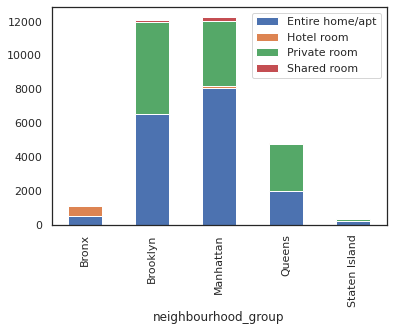

In [ ]:
# create stacked bar
df_room_group_transpose = pd.DataFrame({'neighbourhood_group': ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
                   'Entire home/apt': [508, 6552, 8063, 1986, 196],
                   'Hotel room': [586, 5, 149, 9, 0],
                   'Private room':[0, 5387, 3822, 2756, 128],
                   'Shared room':[27, 155, 204, 83, 0]})


# create stacked bar
sns.set(style='white')
df_room_group_transpose.set_index('neighbourhood_group').plot(kind='bar', stacked=True)

In [ ]:
df_room_group_n = df.groupby(['neighbourhood_group'])[['id']].count().reset_index()
df_room_group_n

neighbourhood_group     id
0               Bronx    980
1            Brooklyn  10624
2           Manhattan  11293
3              Queens   4110
4       Staten Island    303

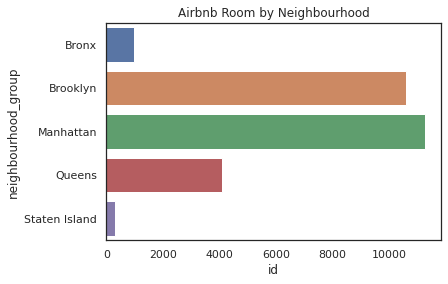

In [ ]:
plt.title('Airbnb Room by Neighbourhood')
sns.barplot(x='id', y='neighbourhood_group', orient='h', data=df_room_group_n)

### Heatmap
 

In [ ]:
df.corr()

id   host_id  latitude  longitude  \
id                              1.000000  0.069193  0.000254   0.023802   
host_id                         0.069193  1.000000  0.019139   0.138598   
latitude                        0.000254  0.019139  1.000000   0.047206   
longitude                       0.023802  0.138598  0.047206   1.000000   
accommodates                    0.000598  0.033143  0.007769   0.014538   
bedrooms                       -0.001956  0.028348  0.005118   0.008199   
beds                           -0.004159  0.017830  0.001055   0.008993   
review_scores_value            -0.012625 -0.049318 -0.015635   0.000268   
price                          -0.003289  0.030066  0.023329  -0.118504   
minimum_nights                 -0.058581 -0.272717  0.059449  -0.128567   
number_of_reviews              -0.034046 -0.082394 -0.036772   0.048602   
calculated_host_listings_count -0.012445  0.087105  0.065846  -0.079564   
availability_365                0.040754  0.218195 -0.013180   0.137005   
number_of_reviews_ltm          -0.013084  0.186193 -0.038595   0.053164   
zipcode                         0.008192 -0.008532 -0.616981   0.491080   
bathrooms_num                  -0.000572  0.020097  0.008064   0.005885   

                                accommodates  bedrooms      beds  \
id                                  0.000598 -0.001956 -0.004159   
host_id                             0.033143  0.028348  0.017830   
latitude                            0.007769  0.005118  0.001055   
longitude                           0.014538  0.008199  0.008993   
accommodates                        1.000000  0.712231  0.754817   
bedrooms                            0.712231  1.000000  0.763479   
beds                                0.754817  0.763479  1.000000   
review_scores_value                 0.053577  0.008309  0.048532   
price                               0.002878 -0.001152 -0.001570   
minimum_nights                     -0.028691 -0.018158 -0.013690   
number_of_reviews                  -0.002222 -0.003749 -0.001005   
calculated_host_listings_count      0.004665  0.008575 -0.003658   
availability_365                    0.026719  0.022027  0.013096   
number_of_reviews_ltm               0.007481  0.003919  0.000630   
zipcode                             0.003377  0.004771  0.006592   
bathrooms_num                       0.395869  0.521434  0.435985   

                                review_scores_value     price  minimum_nights  \
id                                        -0.012625 -0.003289       -0.058581   
host_id                                   -0.049318  0.030066       -0.272717   
latitude                                  -0.015635  0.023329        0.059449   
longitude                                  0.000268 -0.118504       -0.128567   
accommodates                               0.053577  0.002878       -0.028691   
bedrooms                                   0.008309 -0.001152       -0.018158   
beds                                       0.048532 -0.001570       -0.013690   
review_scores_value                        1.000000 -0.006834        0.035767   
price                                     -0.006834  1.000000       -0.065732   
minimum_nights                             0.035767 -0.065732        1.000000   
number_of_reviews                          0.028184 -0.020167       -0.269832   
calculated_host_listings_count            -0.016906  0.028033        0.061858   
availability_365                          -0.038714  0.099249       -0.238981   
number_of_reviews_ltm                     -0.017147  0.019466       -0.411093   
zipcode                                    0.020531 -0.138527       -0.092524   
bathrooms_num                             -0.034100 -0.002175       -0.019746   

                                number_of_reviews  \
id                                      -0.034046   
host_id                                 -0.082394   
latitude                                -0.036772   
longitude      

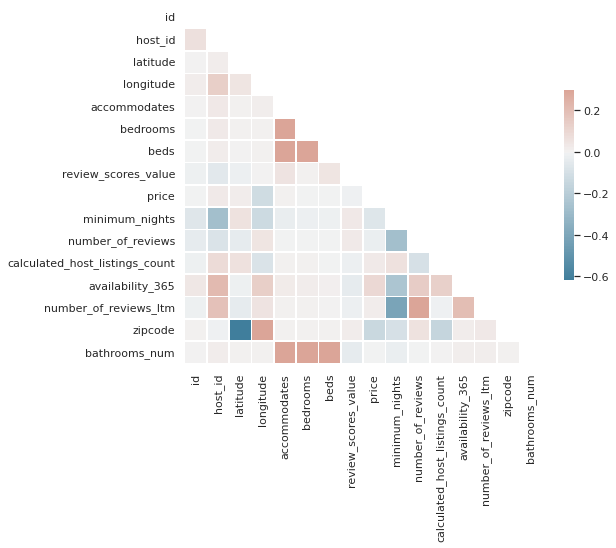

In [ ]:
sns.set_theme(style="white")

# Generate a large random dataset
d = df

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


# Occupancy (Reviews) Data

## Import Reviews data set

In [ ]:
# import reviews dataset 
sheet_url_reviews = 'https://docs.google.com/spreadsheets/d/1k8jGg-A-v2eRBTWo56oFTfPlFnk7YX_IgJLWJ3AC-Qs/edit#gid=797796493'
sheet_url_trf_reviews = sheet_url_reviews.replace('/edit#gid=', '/export?format=csv&gid=')
df_reviews = pd.read_csv(sheet_url_trf_reviews)

## Cleaning Dataset

In [ ]:
# overview dataset
df_reviews.head()

listing_id        date
0     44229.0  2010-10-02
1      2595.0  2009-11-21
2      2595.0  2009-12-05
3      2595.0  2009-12-10
4      2595.0  2010-04-09

In [ ]:
df_reviews['date'] = df_reviews['date'].apply(pd.to_datetime)

In [ ]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985674 entries, 0 to 985673
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   listing_id  985674 non-null  float64       
 1   date        985674 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 15.0 MB


In [ ]:
# create column occupancy
df_reviews_occupancy = df_reviews.groupby('listing_id').count().reset_index()
df_reviews_occupancy.rename(columns={'date': 'occupancy'}, inplace=True)
df_reviews_occupancy

listing_id  occupancy
0      2.595000e+03         48
1      5.121000e+03         50
2      5.136000e+03          2
3      5.178000e+03        536
4      5.203000e+03        118
...             ...        ...
29456  6.354948e+17          1
29457  6.355318e+17          1
29458  6.375855e+17          1
29459  6.384747e+17          1
29460  6.391771e+17          1

[29461 rows x 2 columns]

### Merging dataset

In [ ]:
df_merge_occ = pd.merge(df, df_reviews_occupancy, how='left', left_on ='id', right_on ='listing_id')
df_merge_occ.drop('listing_id', axis = 1, inplace=True)
df_merge_occ

id                                               name  \
0          2595                              Skylit Midtown Castle   
1          5121                                    BlissArtsSpace!   
2          5136           Spacious Brooklyn Duplex, Patio + Garden   
3          5178                    Large Furnished Room Near B'way   
4          5203                 Cozy Clean Guest Room - Family Apt   
...         ...                                                ...   
27305  24178848  Amazing Entire Home Minutes To TimeSquare NYC ...   
27306  53261541                           Central Park and You -40   
27307    363320                                HOME AWAY FROM HOME   
27308  44189193   Beautiful studio Apartment on Central Park West.   
27309   9170129  Modern Manhattan Central Park Apt w/ Priv Backyrd   

                                             description  \
0      Beautiful, spacious skylit studio in the heart...   
1      One room available for rent in a 2 bedroom apt...   
2      We welcome you to stay in our lovely 2 br dupl...   
3      Please don’t expect the luxury here just a bas...   
4      Our best guests are seeking a safe, clean, spa...   
...                                                  ...   
27305  Beautiful two bedroom, two bathroom, apt with ...   
27306                                                NaN   
27307  Thank you for your interest.<br />Who do you r...   
27308  Show up and start living from day one in Downt...   
27309  With a majestic location from which to experie...   

                                   neighborhood_overview    host_id  \
0      Centrally located in the heart of Manhattan ju...       2845   
1                                                    NaN       7356   
2                                                    NaN       7378   
3        Theater district, many restaurants around here.       8967   
4      Our neighborhood is full of restaurants and ca...       7490   
...                                                  ...        ...   
27305                                                NaN  182231443   
27306                                                NaN    2653479   
27307                                                NaN     390251   
27308  This rental is located in NYCâ€™s East Village...  333993552   
27309                                                NaN   46973966   

       host_response_time host_is_superhost neighbourhood_group  \
0      a few days or more                 f           Manhattan   
1          within an hour                 f            Brooklyn   
2          within an hour                 f            Brooklyn   
3            within a day                 f           Manhattan   
4      Host not Answering                 f           Manhattan   
...                   ...               ...                 ...   
27305        within a day                 f           Manhattan   
27306      within an hour                 f           Manhattan   
27307      within an hour                 f           Manhattan   
27308      within an hour                 f           Manhattan   
27309  within a few hours                 f           Manhattan   

            neighbourhood  latitude  longitude        room_type  accommodates  \
0                 Midtown  40.75356  -73.98559  Entire home/apt             1   
1      Bedford-Stuyvesant  40.68535  -73.95512     Private room             2   
2             Sunset Park  40.66265  -73.99454  Entire home/apt             4   
3                 Midtown  40.76457  -73.98317     Private room             2   
4         Upper West Side  40.80380  -73.96751     Private room             1   
...                   ...       ...        ...              ...           ...   
27305      Hell's Kitchen  40.77377  -74.01633  Entire home/apt             2   
27306        Central Park  40.79903  -73.95926     Private room             6   
27307        Central Park  40.79818  -73.95336     Private room 

In [ ]:
# change NaN occupancy to 0
df_merge_occ['occupancy'].fillna(0, inplace=True)

### Heatmap
 

In [ ]:
df_merge_occ.corr()

id   host_id  latitude  longitude  \
id                              1.000000  0.069193  0.000254   0.023802   
host_id                         0.069193  1.000000  0.019139   0.138598   
latitude                        0.000254  0.019139  1.000000   0.047206   
longitude                       0.023802  0.138598  0.047206   1.000000   
accommodates                    0.000598  0.033143  0.007769   0.014538   
bedrooms                       -0.001956  0.028348  0.005118   0.008199   
beds                           -0.004159  0.017830  0.001055   0.008993   
review_scores_value            -0.012625 -0.049318 -0.015635   0.000268   
price                          -0.003289  0.030066  0.023329  -0.118504   
minimum_nights                 -0.058581 -0.272717  0.059449  -0.128567   
number_of_reviews              -0.034046 -0.082394 -0.036772   0.048602   
calculated_host_listings_count -0.012445  0.087105  0.065846  -0.079564   
availability_365                0.040754  0.218195 -0.013180   0.137005   
number_of_reviews_ltm          -0.013084  0.186193 -0.038595   0.053164   
zipcode                         0.008192 -0.008532 -0.616981   0.491080   
bathrooms_num                  -0.000572  0.020097  0.008064   0.005885   
occupancy                      -0.040475 -0.082937 -0.036772   0.048472   

                                accommodates  bedrooms      beds  \
id                                  0.000598 -0.001956 -0.004159   
host_id                             0.033143  0.028348  0.017830   
latitude                            0.007769  0.005118  0.001055   
longitude                           0.014538  0.008199  0.008993   
accommodates                        1.000000  0.712231  0.754817   
bedrooms                            0.712231  1.000000  0.763479   
beds                                0.754817  0.763479  1.000000   
review_scores_value                 0.053577  0.008309  0.048532   
price                               0.002878 -0.001152 -0.001570   
minimum_nights                     -0.028691 -0.018158 -0.013690   
number_of_reviews                  -0.002222 -0.003749 -0.001005   
calculated_host_listings_count      0.004665  0.008575 -0.003658   
availability_365                    0.026719  0.022027  0.013096   
number_of_reviews_ltm               0.007481  0.003919  0.000630   
zipcode                             0.003377  0.004771  0.006592   
bathrooms_num                       0.395869  0.521434  0.435985   
occupancy                          -0.002235 -0.003720 -0.000989   

                                review_scores_value     price  minimum_nights  \
id                                        -0.012625 -0.003289       -0.058581   
host_id                                   -0.049318  0.030066       -0.272717   
latitude                                  -0.015635  0.023329        0.059449   
longitude                                  0.000268 -0.118504       -0.128567   
accommodates                               0.053577  0.002878       -0.028691   
bedrooms                                   0.008309 -0.001152       -0.018158   
beds                                       0.048532 -0.001570       -0.013690   
review_scores_value                        1.000000 -0.006834        0.035767   
price                                     -0.006834  1.000000       -0.065732   
minimum_nights                             0.035767 -0.065732        1.000000   
number_of_reviews                          0.028184 -0.020167       -0.269832   
calculated_host_listings_count            -0.016906  0.028033        0.061858   
availability_365                          -0.038714  0.099249       -0.238981   
number_of_reviews_ltm                     -0.017147  0.019466       -0.411093   
zipcode                                    0.020531 -0.138527       -0.092524   
bathrooms_num                             -0.034100 -0.002175       -0.019746   
occupancy                                  0.028244 -0.020108       -0.269311   

   

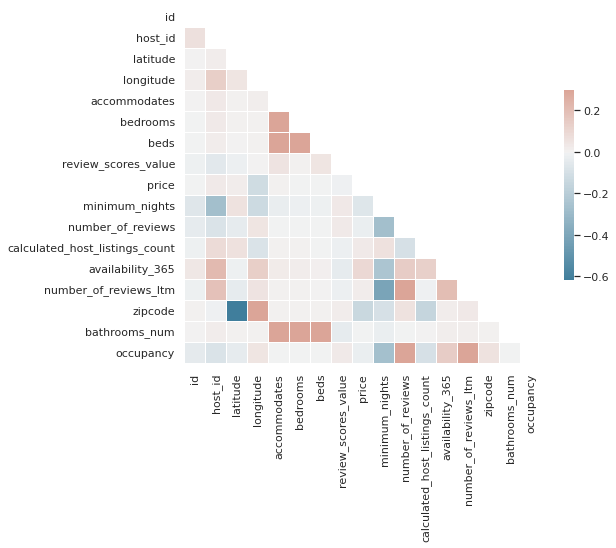

In [ ]:
sns.set_theme(style="white")

# Generate a large random dataset
d = df_merge_occ

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


## EDA Occupancy

### Prepare and grouping dataset

In [ ]:
# slice by day
df_reviews['day'] = df_reviews['date'].dt.strftime('%A')
df_reviews['day'] = pd.Categorical(df_reviews['day'], 
    categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)

In [ ]:
# slice by month
df_reviews['month'] = df_reviews['date'].dt.strftime('%B')
df_reviews['month'] = pd.Categorical(df_reviews['month'], 
    categories=['January','February','March','April','May','June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)

In [ ]:
# slice by year
df_reviews['year'] = df_reviews['date'].dt.strftime('%Y')

# slice by month-year
df_reviews['month_year'] = df_reviews['date'].dt.strftime('%Y-%m')

# slice by week
df_reviews['week'] = df_reviews['date'].dt.strftime('%W')

df_reviews

listing_id       date       day     month  year month_year week
0          44229.0 2010-10-02  Saturday   October  2010    2010-10   39
1           2595.0 2009-11-21  Saturday  November  2009    2009-11   46
2           2595.0 2009-12-05  Saturday  December  2009    2009-12   48
3           2595.0 2009-12-10  Thursday  December  2009    2009-12   49
4           2595.0 2010-04-09    Friday     April  2010    2010-04   14
...            ...        ...       ...       ...   ...        ...  ...
985669  40733335.0 2022-05-14  Saturday       May  2022    2022-05   19
985670  40733335.0 2022-05-20    Friday       May  2022    2022-05   20
985671  40733335.0 2022-05-31   Tuesday       May  2022    2022-05   22
985672  49962110.0 2022-01-09    Sunday   January  2022    2022-01   01
985673  49962110.0 2022-01-31    Monday   January  2022    2022-01   05

[985674 rows x 7 columns]

In [ ]:
# grouping data
df_reviews_day = df_reviews.groupby('day')['listing_id'].count().reset_index()
df_reviews_month_year = df_reviews.groupby('month_year')['listing_id'].count().reset_index()
df_reviews_year = df_reviews.groupby('year')['listing_id'].count().reset_index()
df_reviews_month = df_reviews.groupby('month')['listing_id'].count().reset_index()

### Finding occupancy

In [ ]:
occupancy = df_reviews[df_reviews['year'] == '2019']
occupancy

listing_id       date        day     month  year month_year week
43          2595.0 2019-01-02  Wednesday   January  2019    2019-01   00
44          2595.0 2019-05-07    Tuesday       May  2019    2019-05   18
45          2595.0 2019-05-21    Tuesday       May  2019    2019-05   20
46          2595.0 2019-07-14     Sunday      July  2019    2019-07   27
47          2595.0 2019-08-21  Wednesday    August  2019    2019-08   33
...            ...        ...        ...       ...   ...        ...  ...
985532  11767412.0 2019-10-14     Monday   October  2019    2019-10   41
985605  40733335.0 2019-12-16     Monday  December  2019    2019-12   50
985606  40733335.0 2019-12-23     Monday  December  2019    2019-12   51
985607  40733335.0 2019-12-27     Friday  December  2019    2019-12   51
985608  40733335.0 2019-12-31    Tuesday  December  2019    2019-12   52

[194749 rows x 7 columns]

In [ ]:
occupancy_grouped = occupancy.groupby('listing_id')[['year']].count().reset_index()
occupancy_grouped

listing_id  year
0          2595.0     6
1          5121.0     1
2          5178.0    52
3          5295.0    11
4          5803.0    14
...           ...   ...
11705  41069298.0     1
11706  41740615.0     1
11707  41792753.0   213
11708  42279171.0    30
11709  42384501.0    24

[11710 rows x 2 columns]

In [ ]:
occupancy_grouped['occupancy'] = occupancy_grouped['year'] / 365
occupancy_grouped

listing_id  year  occupancy
0          2595.0     6   0.016438
1          5121.0     1   0.002740
2          5178.0    52   0.142466
3          5295.0    11   0.030137
4          5803.0    14   0.038356
...           ...   ...        ...
11705  41069298.0     1   0.002740
11706  41740615.0     1   0.002740
11707  41792753.0   213   0.583562
11708  42279171.0    30   0.082192
11709  42384501.0    24   0.065753

[11710 rows x 3 columns]

In [ ]:
occupancy_grouped.describe()

listing_id          year     occupancy
count  1.171000e+04  11710.000000  11710.000000
mean   2.111909e+07     16.630999      0.045564
std    1.258471e+07     19.190431      0.052577
min    2.595000e+03      1.000000      0.002740
25%    9.859799e+06      3.000000      0.008219
50%    2.198332e+07      9.000000      0.024658
75%    3.207633e+07     25.000000      0.068493
max    4.238450e+07    247.000000      0.676712

### Trend based on Day


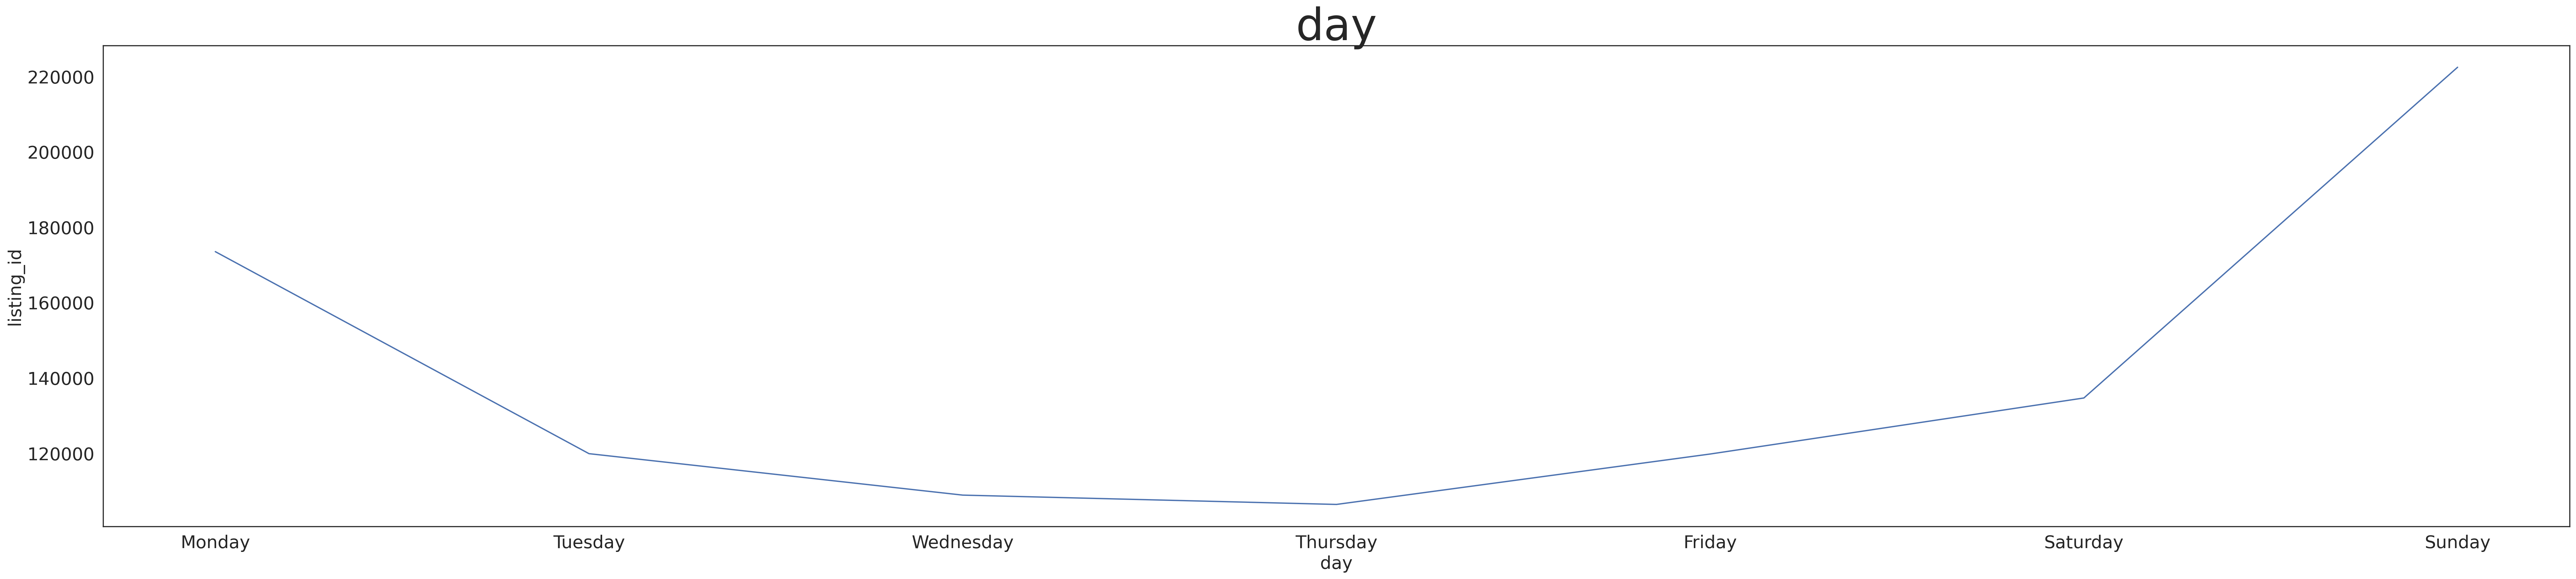

In [ ]:
plt.figure(figsize=(50,10), dpi=200)
plt.xlabel('day', fontsize=20)
plt.ylabel('listing_id', fontsize=20)
plt.xticks(rotation=0, fontsize=20)
plt.yticks(fontsize=20)
plt.title('day', fontsize=50)
sns.lineplot(data=df_reviews_day, x='day', y='listing_id')

### Trend based on Month-Year

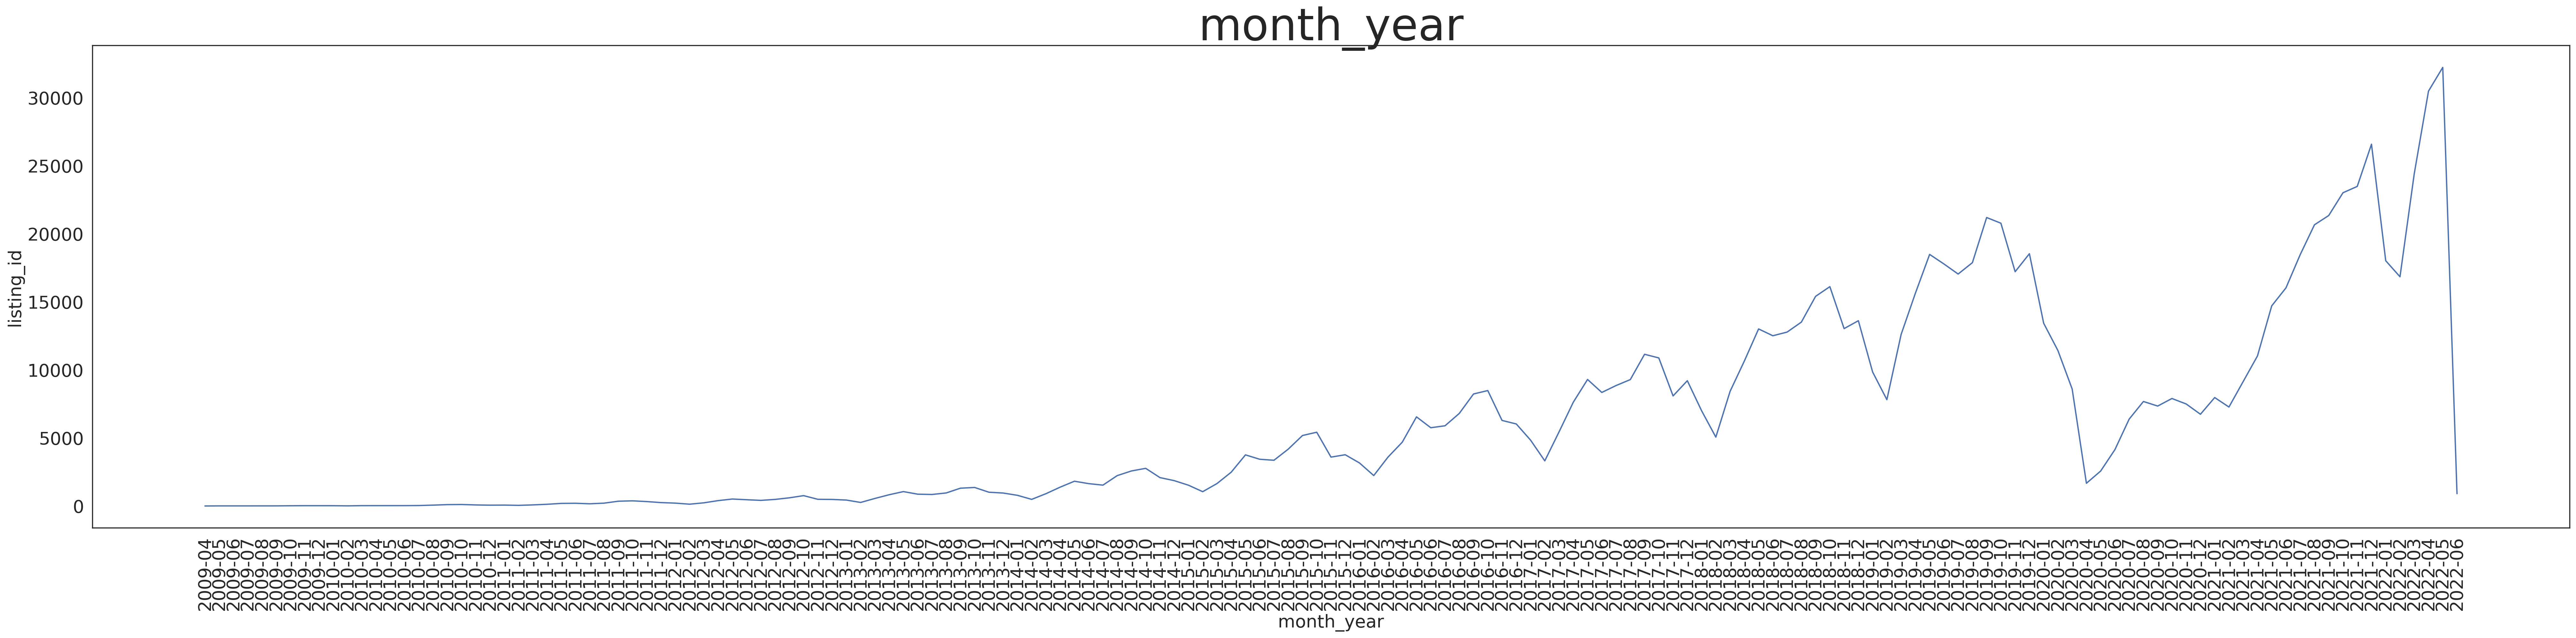

In [ ]:
plt.figure(figsize=(50,10), dpi=200)
plt.xlabel('month_year', fontsize=20)
plt.ylabel('listing_id', fontsize=20)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.title('month_year', fontsize=50)
sns.lineplot(data=df_reviews_month_year, x='month_year', y='listing_id')

### Trend based on Year

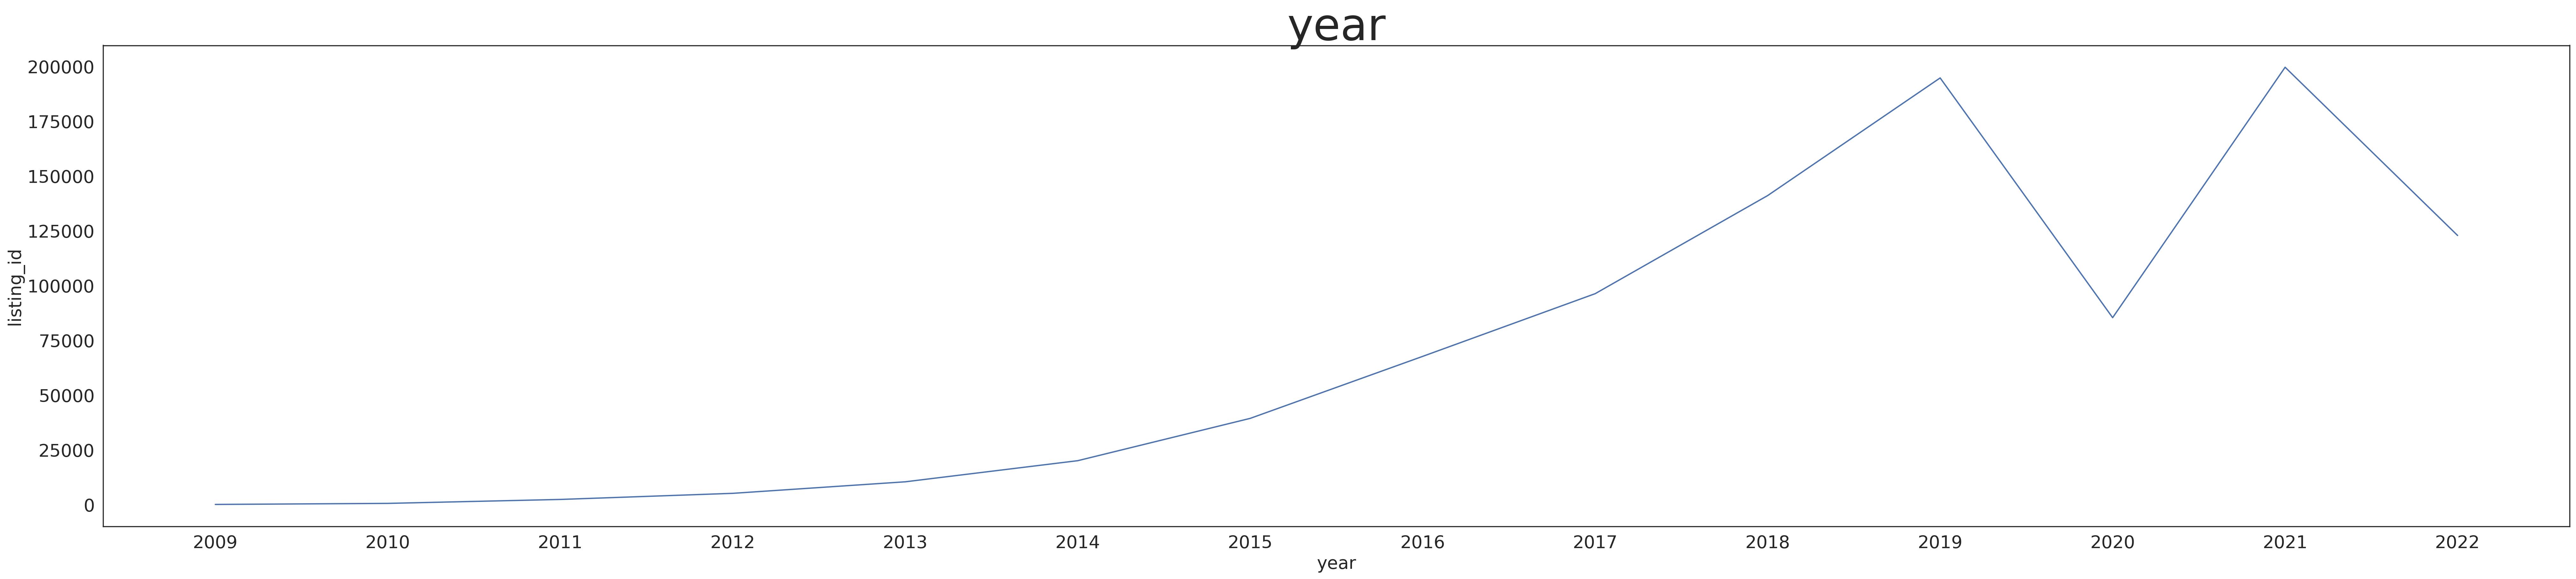

In [ ]:
plt.figure(figsize=(50,10), dpi=200)
plt.xlabel('year', fontsize=20)
plt.ylabel('listing_id', fontsize=20)
plt.xticks(rotation=0, fontsize=20)
plt.yticks(fontsize=20)
plt.title('year', fontsize=50)
sns.lineplot(data=df_reviews_year, x='year', y='listing_id')

### Trend based on Month

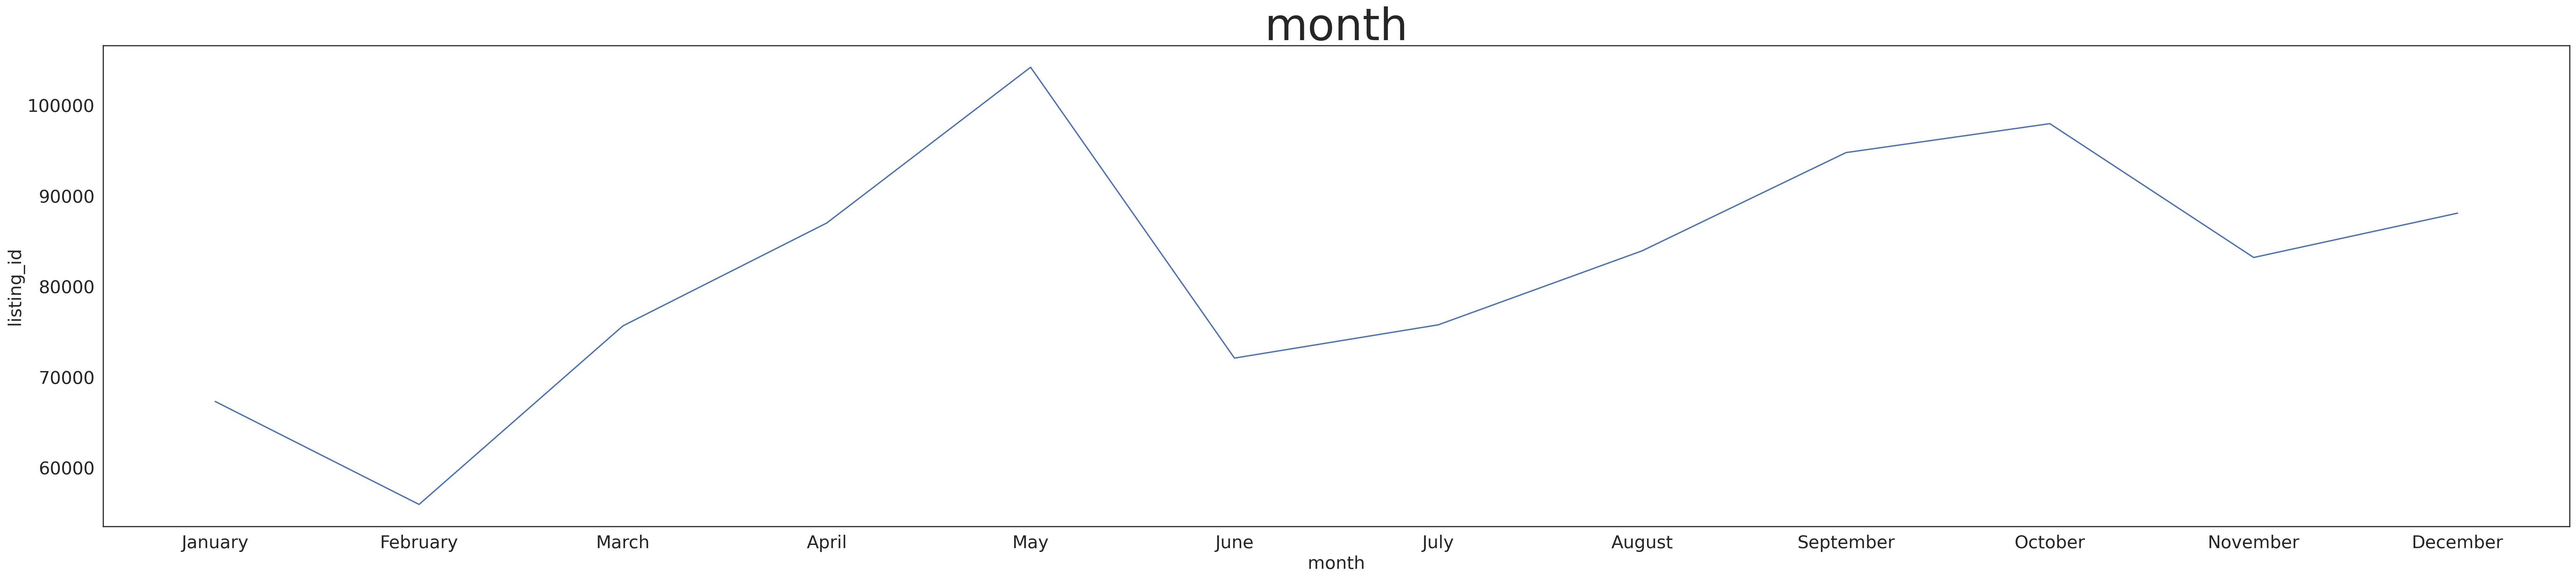

In [ ]:
plt.figure(figsize=(50,10), dpi=200)
plt.xlabel('month', fontsize=20)
plt.ylabel('listing_id', fontsize=20)
plt.xticks(rotation=0, fontsize=20)
plt.yticks(fontsize=20)
plt.title('month', fontsize=50)
sns.lineplot(data=df_reviews_month, x='month', y='listing_id')

# Covid Data

## Import Covid data set

In [ ]:
# import covid dataset
sheet_url_covid = 'https://docs.google.com/spreadsheets/d/1kMBl6-c3L9jrJ4Cm3Gq5SOuCB4tJ3u4hHbumbHK5M9k/edit#gid=1407276418'
sheet_url_trf_covid = sheet_url_covid.replace('/edit#gid=', '/export?format=csv&gid=')
df_covid = pd.read_csv(sheet_url_trf_covid)
df_covid.head()

iso_code      continent       location       date  total_cases  new_cases  \
0      USA  North America  United States  1/22/2020            1        NaN   
1      USA  North America  United States  1/23/2020            1        0.0   
2      USA  North America  United States  1/24/2020            2        1.0   
3      USA  North America  United States  1/25/2020            2        0.0   
4      USA  North America  United States  1/26/2020            5        3.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                 NaN           NaN         NaN                  NaN   
1                 NaN           NaN         NaN                  NaN   
2                 NaN           NaN         NaN                  NaN   
3                 NaN           NaN         NaN                  NaN   
4                 NaN           NaN         NaN                  NaN   

   total_cases_per_million  new_cases_per_million  \
0                    0.003                    NaN   
1                    0.003                  0.000   
2                    0.006                  0.003   
3                    0.006                  0.000   
4                    0.015                  0.009   

   new_cases_smoothed_per_million  total_deaths_per_million  \
0                             NaN                       NaN   
1                             NaN                       NaN   
2                             NaN                       NaN   
3                             NaN                       NaN   
4                             NaN                       NaN   

   new_deaths_per_million  new_deaths_smoothed_per_million  reproduction_rate  \
0                     NaN                              NaN                NaN   
1                     NaN                              NaN                NaN   
2                     NaN                              NaN                NaN   
3                     NaN                              NaN                NaN   
4                     NaN                              NaN                NaN   

   icu_patients  icu_patients_per_million  hosp_patients  \
0           NaN                       NaN            NaN   
1           NaN                       NaN            NaN   
2           NaN                       NaN            NaN   
3           NaN                       NaN            NaN   
4           NaN                       NaN            NaN   

   hosp_patients_per_million  weekly_icu_admissions  \
0                        NaN                    NaN   
1                        NaN                    NaN   
2                        NaN                    NaN   
3                        NaN                    NaN   
4                        NaN                    NaN   

   weekly_icu_admissions_per_million  weekly_hosp_admissions  \
0                                NaN                     NaN   
1                                NaN                     NaN   
2                                NaN                     NaN   
3                                NaN                     NaN   
4                                NaN                     NaN   

   weekly_hosp_admissions_per_million  total_tests  new_tests  \
0                                 NaN          NaN        NaN   
1                                 NaN          NaN        NaN   
2                                 NaN          NaN        NaN   
3                                 NaN          NaN        NaN   
4                                 NaN          NaN        NaN   

   total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  \
0                       NaN                     NaN                 NaN   
1                       NaN                     NaN                 NaN   
2                       NaN                     NaN                 NaN   
3                       NaN                     NaN                 NaN   
4                       NaN                     NaN               

## EDA Covid

### Prepare and grouping dataset

In [ ]:
df_covid['date'] = df_covid['date'].apply(pd.to_datetime)

In [ ]:
df_covid['month_year'] = df_covid['date'].dt.strftime('%Y-%m')
df_covid_month_year = df_covid.groupby('month_year')['new_cases'].sum().reset_index().sort_values(by='month_year')
df_covid_month_year

month_year   new_cases
0     2020-01         7.0
1     2020-02        17.0
2     2020-03    192054.0
3     2020-04    884439.0
4     2020-05    711721.0
5     2020-06    856854.0
6     2020-07   1898598.0
7     2020-08   1499186.0
8     2020-09   1197153.0
9     2020-10   1917435.0
10    2020-11   4470540.0
11    2020-12   6563296.0
12    2021-01   6146614.0
13    2021-02   2409437.0
14    2021-03   1815360.0
15    2021-04   1888950.0
16    2021-05    924297.0
17    2021-06    400358.0
18    2021-07   1324014.0
19    2021-08   4282790.0
20    2021-09   4143240.0
21    2021-10   2509280.0
22    2021-11   2548183.0
23    2021-12   6251611.0
24    2022-01  20320204.0
25    2022-02   3962393.0
26    2022-03   1056449.0
27    2022-04   1253432.0
28    2022-05   2875438.0
29    2022-06   3324135.0
30    2022-07    635907.0

### Trend based on Month Year

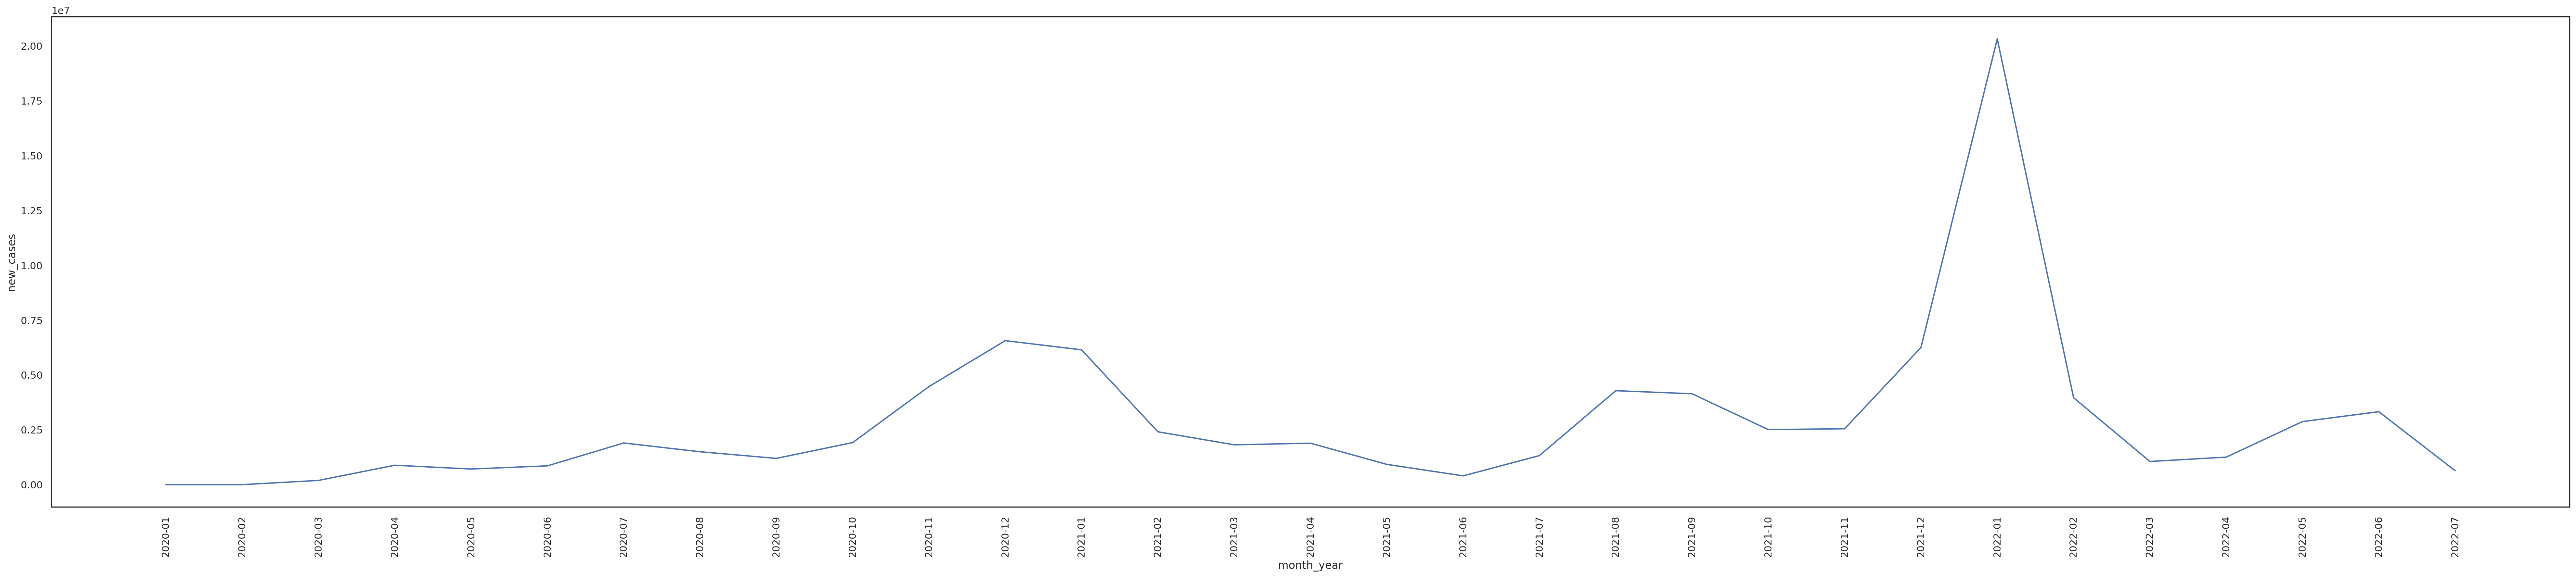

In [ ]:
plt.figure(figsize=(50,10), dpi=200)
plt.xticks(rotation=90)
sns.lineplot(data=df_covid_month_year, x='month_year', y='new_cases')

# RFM

## Data preparation

In [ ]:
# merge table listings and reviews
joined_table = df_merge_occ.merge(df_reviews, left_on = 'id', right_on = 'listing_id', how='left')
joined_table.drop('listing_id', axis = 1, inplace=True)
joined_table

id                                               name  \
0          2595                              Skylit Midtown Castle   
1          2595                              Skylit Midtown Castle   
2          2595                              Skylit Midtown Castle   
3          2595                              Skylit Midtown Castle   
4          2595                              Skylit Midtown Castle   
...         ...                                                ...   
968668  9170129  Modern Manhattan Central Park Apt w/ Priv Backyrd   
968669  9170129  Modern Manhattan Central Park Apt w/ Priv Backyrd   
968670  9170129  Modern Manhattan Central Park Apt w/ Priv Backyrd   
968671  9170129  Modern Manhattan Central Park Apt w/ Priv Backyrd   
968672  9170129  Modern Manhattan Central Park Apt w/ Priv Backyrd   

                                              description  \
0       Beautiful, spacious skylit studio in the heart...   
1       Beautiful, spacious skylit studio in the heart...   
2       Beautiful, spacious skylit studio in the heart...   
3       Beautiful, spacious skylit studio in the heart...   
4       Beautiful, spacious skylit studio in the heart...   
...                                                   ...   
968668  With a majestic location from which to experie...   
968669  With a majestic location from which to experie...   
968670  With a majestic location from which to experie...   
968671  With a majestic location from which to experie...   
968672  With a majestic location from which to experie...   

                                    neighborhood_overview   host_id  \
0       Centrally located in the heart of Manhattan ju...      2845   
1       Centrally located in the heart of Manhattan ju...      2845   
2       Centrally located in the heart of Manhattan ju...      2845   
3       Centrally located in the heart of Manhattan ju...      2845   
4       Centrally located in the heart of Manhattan ju...      2845   
...                                                   ...       ...   
968668                                                NaN  46973966   
968669                                                NaN  46973966   
968670                                                NaN  46973966   
968671                                                NaN  46973966   
968672                                                NaN  46973966   

        host_response_time host_is_superhost neighbourhood_group  \
0       a few days or more                 f           Manhattan   
1       a few days or more                 f           Manhattan   
2       a few days or more                 f           Manhattan   
3       a few days or more                 f           Manhattan   
4       a few days or more                 f           Manhattan   
...                    ...               ...                 ...   
968668  within a few hours                 f           Manhattan   
968669  within a few hours                 f           Manhattan   
968670  within a few hours                 f           Manhattan   
968671  within a few hours                 f           Manhattan   
968672  within a few hours                 f           Manhattan   

       neighbourhood  latitude  longitude        room_type  accommodates  \
0            Midtown  40.75356  -73.98559  Entire home/apt             1   
1            Midtown  40.75356  -73.98559  Entire home/apt             1   
2            Midtown  40.75356  -73.98559  Entire home/apt             1   
3            Midtown  40.75356  -73.98559  Entire home/apt             1   
4            Midtown  40.75356  -73.98559  Entire home/apt             1   
...              ...       ...        ...              ...           ...   
968668  Central Park  40.79924  -73.95531  Entire home/apt             2   
968669  Central Park  40.79924  -73.95531  Entire home/apt             2   
968670  Central Park  40.79924  -73.95531  Entire home/apt             2   
968671  C

In [ ]:
joined_table.isna().sum()

id                                     0
name                                  62
description                        16203
neighborhood_overview             355552
host_id                                0
host_response_time                     0
host_is_superhost                      0
neighbourhood_group                    0
neighbourhood                          0
latitude                               0
longitude                              0
room_type                              0
accommodates                           0
bathrooms                              0
bedrooms                               0
beds                                   0
review_scores_value                    0
price                                  0
minimum_nights                         0
number_of_reviews                      0
last_review                            0
calculated_host_listings_count         0
availability_365                       0
number_of_reviews_ltm                  0
country         

In [ ]:
# Set NaN date to arbitrary date
joined_table['date'] = joined_table['date'].fillna('01/01/2010')

## RFM Analysis

In [ ]:
import datetime as dt

In [ ]:
now = dt.datetime(2022,6,4)

In [ ]:
#RFM Data Frame
rfm = joined_table.groupby('id').agg({'date' : lambda day : (now - day.max()).days,
                               'id': lambda num : len(num),
                              'price': lambda price : price.sum()
                             })
col_list = ['Recency','Frequency','Monetary']
rfm.columns = col_list
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27310 entries, 2595 to 639000000000000000
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    27310 non-null  int64
 1   Frequency  27310 non-null  int64
 2   Monetary   27310 non-null  int64
dtypes: int64(3)
memory usage: 853.4 KB


In [ ]:
rfm

Recency  Frequency  Monetary
id                                              
2595                    943         48     10800
5121                    915         50      3000
5136                    300          2       550
5178                     26        536     36448
5203                   1779        118      8850
...                     ...        ...       ...
634000000000000000     4537          1       389
635000000000000000     4537          1        75
636000000000000000     4537          1       189
638000000000000000     4537          1        74
639000000000000000     4537          1       160

[27310 rows x 3 columns]

In [ ]:
# Ranking Listing's based upon their recency, frequency, and monetary score
rfm['R_rank'] = rfm['Recency'].rank(ascending=False)
rfm['F_rank'] = rfm['Frequency'].rank(ascending=True)
rfm['M_rank'] = rfm['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm['R_rank_norm'] = (rfm['R_rank']/rfm['R_rank'].max())*100
rfm['F_rank_norm'] = (rfm['F_rank']/rfm['F_rank'].max())*100
rfm['M_rank_norm'] = (rfm['F_rank']/rfm['M_rank'].max())*100
 
rfm.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm.head()

Recency  Frequency  Monetary  R_rank_norm  F_rank_norm  M_rank_norm
id                                                                       
2595      943         48     10800    26.206301    78.736726    78.736726
5121      915         50      3000    26.876469    79.381179    79.381179
5136      300          2       550    43.153276    17.107287    17.107287
5178       26        536     36448    70.900044    99.904797    99.904797
5203     1779        118      8850    11.009107    91.948004    91.948004

In [ ]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27310 entries, 2595 to 639000000000000000
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Recency      27310 non-null  int64  
 1   Frequency    27310 non-null  int64  
 2   Monetary     27310 non-null  int64  
 3   R_rank_norm  27310 non-null  float64
 4   F_rank_norm  27310 non-null  float64
 5   M_rank_norm  27310 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 1.5 MB


In [ ]:
# Calculating RFM score
rfm['RFM_Score_Total'] = 0.15*rfm['R_rank_norm']+0.28 * \
	rfm['F_rank_norm']+0.57*rfm['M_rank_norm']
rfm['RFM_Score_Total'] *= 0.05
rfm = rfm.round(2)
rfm	

Recency  Frequency  Monetary  R_rank_norm  F_rank_norm  \
id                                                                           
2595                    943         48     10800        26.21        78.74   
5121                    915         50      3000        26.88        79.38   
5136                    300          2       550        43.15        17.11   
5178                     26        536     36448        70.90        99.90   
5203                   1779        118      8850        11.01        91.95   
...                     ...        ...       ...          ...          ...   
634000000000000000     4537          1       389         0.25         6.50   
635000000000000000     4537          1        75         0.25         6.50   
636000000000000000     4537          1       189         0.25         6.50   
638000000000000000     4537          1        74         0.25         6.50   
639000000000000000     4537          1       160         0.25         6.50   

                    M_rank_norm  RFM_Score_Total  
id                                                
2595                      78.74             3.54  
5121                      79.38             3.58  
5136                      17.11             1.05  
5178                      99.90             4.78  
5203                      91.95             3.99  
...                         ...              ...  
634000000000000000         6.50             0.28  
635000000000000000         6.50             0.28  
636000000000000000         6.50             0.28  
638000000000000000         6.50             0.28  
639000000000000000         6.50             0.28  

[27310 rows x 7 columns]

In [ ]:
rfm['RFM_Score_Total'].describe()

count    27310.000000
mean         2.501177
std          1.347659
min          0.280000
25%          1.340000
50%          2.500000
75%          3.670000
max          5.000000
Name: RFM_Score_Total, dtype: float64

In [ ]:
# Rating Listings based upon the RFM score
# rfm score >4.5 : Top Listings
# 4.5 > rfm score > 4 : High Value Listings
# 4>rfm score >3 : Medium Value Listings
# 3>rfm score>1.6 : Low Value Listings
# rfm score<1.6 : Lost Listings

In [ ]:
rfm["listings_segment"] = np.where(rfm['RFM_Score_Total'] >
                                      4.5, "Top Listings",
                                      (np.where(
                                        rfm['RFM_Score_Total'] > 4,
                                        "High Value Listings",
                                        (np.where(
    rfm['RFM_Score_Total'] > 3,
                             "Medium Value Listings",
                             np.where(rfm['RFM_Score_Total'] > 1.6,
                            'Low Value Listings', 'Lost Listings'))))))

In [ ]:
rfm[rfm['listings_segment'] == 'Top Listings']

Recency  Frequency  Monetary  R_rank_norm  F_rank_norm  M_rank_norm  \
id                                                                              
5178           26        536     36448        70.90        99.90        99.90   
5803           17        211     24898        77.96        97.41        97.41   
6848          104        184     15456        56.13        96.47        96.47   
6990           25        238     14756        71.40        98.12        98.12   
7097           14        294     58506        81.79        99.08        99.08   
...           ...        ...       ...          ...          ...          ...   
51960731        3        104      8112        98.42        90.40        90.40   
52155173        7        209     40337        89.99        97.33        97.33   
52795626       15        291    121056        80.42        99.05        99.05   
53843545        4        199     73033        96.87        97.01        97.01   
54160208        2        136     21488        99.36        93.62        93.62   

          RFM_Score_Total listings_segment  
id                                          
5178                 4.78     Top Listings  
5803                 4.72     Top Listings  
6848                 4.52     Top Listings  
6990                 4.71     Top Listings  
7097                 4.82     Top Listings  
...                   ...              ...  
51960731             4.58     Top Listings  
52155173             4.81     Top Listings  
52795626             4.81     Top Listings  
53843545             4.85     Top Listings  
54160208             4.72     Top Listings  

[1882 rows x 8 columns]

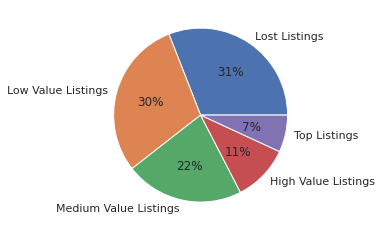

In [ ]:
# Visualizing the customer segments
plt.pie(rfm['listings_segment'].value_counts(),
		labels=rfm['listings_segment'].value_counts().index,
		autopct='%.0f%%')
plt.show()

In [ ]:
rfm_groupby = rfm.groupby('listings_segment')['Recency', 'Frequency', 'Monetary'].agg(['count', 'mean', 'median', 'sum'])
rfm_groupby

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Recency                              Frequency  \
                        count         mean median      sum     count   
listings_segment                                                       
High Value Listings      2874   160.216423   20.0   460462      2874   
Lost Listings            8448  1134.165956  968.5  9581434      8448   
Low Value Listings       8088   592.823318  215.0  4794755      8088   
Medium Value Listings    6018   280.025590   34.0  1685194      6018   
Top Listings             1882    17.171626   10.0    32317      1882   

                                                 Monetary                \
                             mean median     sum    count          mean   
listings_segment                                                          
High Value Listings     93.703897   85.0  269305     2874  15559.174669   
Lost Listings            2.063684    2.0   17434     8448    341.080019   
Low Value Listings      10.173343    9.0   82282     8088   1801.709446   
Medium Value Listings   35.835826   32.0  215660     6018   6215.627451   
Top Listings           204.034006  176.0  383992     1882  31776.776302   

                                          
                        median       sum  
listings_segment                          
High Value Listings    11233.5  44717068  
Lost Listings            200.0   2881444  
Low Value Listings      1161.0  14572226  
Medium Value Listings   4300.0  37405646  
Top Listings           23626.5  59803893

In [ ]:
rfm_groupby.to_csv('rfm_groupby.csv')

### Summary RFM

Cluster characteristic RFM

TOP LISTINGS: 

1882 listings (7% of total listings). Total Revenue Generated  59.8 mil USD (38% of total revenue)
- average time since latest customer stay is 17 days ago
- average frequency is 204 times/listings
- average revenue is 31.176 USD/listings


---


HIGH VALUE LISTINGS: 

2874 listings (11% of total listings). Total Revenue Generated  44.7 mil USD (28% of total revenue)
- average time since latest customer stay is 160 days ago
- average frequency is 93 times/listings
- average revenue is 15.559 USD/listings


---


MEDIUM VALUE LISTINGS: 

6018 listings (22% of total listings). Total Revenue Generated  37.4 mil USD (23% of total revenue)
- average time since latest customer stay is 280 days ago (almost 1 year ago)
- average frequency is 35 times/listings
- average revenue is 6.215 USD/listings


---


LOW VALUE LISTINGS: 

8088 listings (30% of total listings). Total Revenue Generated  14.5 mil USD (9% of total revenue)
- average time since latest customer stay is 592 days ago (almost 2 years ago)
- average frequency is 10 times/listings
- average revenue is 1.801 USD/listings


---


LOST LISTINGS: 

8448 listings (31% of total listings). Total Revenue Generated  2.8 mil USD (2% of total revenue)
- average time since latest customer stay is 1134 days ago (3 years ago)
- average frequency is 2 times/listings
- average revenue is 341 USD/listings

### Put the cluster back to raw data


In [ ]:
merge_table_df_and_rfm = rfm.merge(raw_data_copy, on = 'id', how='inner')
merge_table_df_and_rfm = merge_table_df_and_rfm.drop_duplicates(subset='id')
merge_table_df_and_rfm

id  Recency  Frequency  Monetary  R_rank_norm  \
0                    2595      943         48     10800        26.21   
1                    5121      915         50      3000        26.88   
2                    5136      300          2       550        43.15   
3                    5178       26        536     36448        70.90   
4                    5203     1779        118      8850        11.01   
...                   ...      ...        ...       ...          ...   
30658  634000000000000000     4537          1       389         0.25   
30720  635000000000000000     4537          1        75         0.25   
30778  636000000000000000     4537          1       189         0.25   
30812  638000000000000000     4537          1        74         0.25   
30860  639000000000000000     4537          1       160         0.25   

       F_rank_norm  M_rank_norm  RFM_Score_Total       listings_segment  \
0            78.74        78.74             3.54  Medium Value Listings   
1            79.38        79.38             3.58  Medium Value Listings   
2            17.11        17.11             1.05          Lost Listings   
3            99.90        99.90             4.78           Top Listings   
4            91.95        91.95             3.99  Medium Value Listings   
...            ...          ...              ...                    ...   
30658         6.50         6.50             0.28          Lost Listings   
30720         6.50         6.50             0.28          Lost Listings   
30778         6.50         6.50             0.28          Lost Listings   
30812         6.50         6.50             0.28          Lost Listings   
30860         6.50         6.50             0.28          Lost Listings   

                                                    name  \
0                                  Skylit Midtown Castle   
1                                        BlissArtsSpace!   
2               Spacious Brooklyn Duplex, Patio + Garden   
3                        Large Furnished Room Near B'way   
4                     Cozy Clean Guest Room - Family Apt   
...                                                  ...   
30658       Charming 3 bedroom apartment in East Village   
30720             Bedstuy one bedroom with outdoor space   
30778                      Lovely space in Manhattan NYC   
30812    Sunnyside -Locals' favorite neighbor for living   
30860  Bright & Spacious 1 Bedroom Apt. Next to the Park   

                                             description  \
0      Beautiful, spacious skylit studio in the heart...   
1      One room available for rent in a 2 bedroom apt...   
2      We welcome you to stay in our lovely 2 br dupl...   
3      Please don’t expect the luxury here just a bas...   
4      Our best guests are seeking a safe, clean, spa...   
...                                                  ...   
30658  Providing affordable housing to international ...   
30720  At this peaceful and centrally-located place. ...   
30778  Your family will be close to everything when y...   
30812  Want to stay in the 'most happening' part of M...   
30860  Enjoy easy access to everything from this perf...   

                                   neighborhood_overview    host_id  \
0      Centrally located in the heart of Manhattan ju...       2845   
1                                                    NaN       7356   
2                                                    NaN       7378   
3        Theater district, many restaurants around here.       8967   
4      Our neighborhood is full of restaurants and ca...       7490   
...                                                  ...        ...   
30658  My home is down the block from an elementary s...  459355490   
30720                                                NaN  124702572   
30778                                                NaN  459778513   
30812                                                NaN  204704622   
30860  Very central location in a 

In [ ]:
merge_table_df_and_rfm.to_csv('rfm.csv')

In [ ]:
merge_table_df_and_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27310 entries, 0 to 30860
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              27310 non-null  int64  
 1   Recency                         27310 non-null  int64  
 2   Frequency                       27310 non-null  int64  
 3   Monetary                        27310 non-null  int64  
 4   R_rank_norm                     27310 non-null  float64
 5   F_rank_norm                     27310 non-null  float64
 6   M_rank_norm                     27310 non-null  float64
 7   RFM_Score_Total                 27310 non-null  float64
 8   listings_segment                27310 non-null  object 
 9   name                            27304 non-null  object 
 10  description                     26637 non-null  object 
 11  neighborhood_overview           16779 non-null  object 
 12  host_id                         

In [ ]:
grouped_table = merge_table_df_and_rfm.groupby('listings_segment')['price'].agg(['count', 'sum', 'mean', 'median'])
grouped_table

count      sum        mean  median
listings_segment                                         
High Value Listings     2874   495373  172.363605   126.0
Lost Listings           8448  1447222  171.309422   111.0
Low Value Listings      8088  1460042  180.519535   125.0
Medium Value Listings   6018  1082213  179.829345   132.0
Top Listings            1882   294549  156.508502   129.0

In [ ]:
# check grouping on numerical values
merge_table_df_and_rfm.groupby('listings_segment')['minimum_nights'].agg(['count', 'sum', 'mean', 'median'])

count     sum       mean  median
listings_segment                                       
High Value Listings     2874   26738   9.303410     3.0
Lost Listings           8448  197574  23.387074    30.0
Low Value Listings      8088  143020  17.682987    30.0
Medium Value Listings   6018   66584  11.064141     3.0
Top Listings            1882    8041   4.272582     2.0

In [ ]:
# check grouping on numerical values
merge_table_df_and_rfm.groupby('listings_segment')['availability_365'].agg(['count', 'sum', 'mean', 'median'])

count     sum        mean  median
listings_segment                                        
High Value Listings     2874  437250  152.139875   138.0
Lost Listings           8448  657404   77.817708     0.0
Low Value Listings      8088  895275  110.691766    39.0
Medium Value Listings   6018  834254  138.626454   117.0
Top Listings            1882  317116  168.499469   168.0

In [ ]:
# check grouping on numerical values
merge_table_df_and_rfm.groupby('listings_segment')['number_of_reviews'].agg(['count', 'sum', 'mean', 'median'])

count     sum        mean  median
listings_segment                                        
High Value Listings     2874  269305   93.703897    85.0
Lost Listings           8448   17834    2.111032     2.0
Low Value Listings      8088   82282   10.173343     9.0
Medium Value Listings   6018  215660   35.835826    32.0
Top Listings            1882  383992  204.034006   176.0

In [ ]:
# check grouping on categorical values
merge_table_df_and_rfm.groupby('listings_segment')['room_type'].describe()

count unique              top  freq
listings_segment                                         
High Value Listings    2874      4  Entire home/apt  1738
Lost Listings          8448      4  Entire home/apt  4526
Low Value Listings     8088      4  Entire home/apt  4770
Medium Value Listings  6018      4  Entire home/apt  3545
Top Listings           1882      4  Entire home/apt  1153

# Wordcloud

## Preparation

In [ ]:
merge_table_df_and_rfm['price'].mean()

175.00545587696814

In [ ]:
merge_table_df_and_rfm.head()

id  Recency  Frequency  Monetary  R_rank_norm  F_rank_norm  M_rank_norm  \
0  2595      943         48     10800        26.21        78.74        78.74   
1  5121      915         50      3000        26.88        79.38        79.38   
2  5136      300          2       550        43.15        17.11        17.11   
3  5178       26        536     36448        70.90        99.90        99.90   
4  5203     1779        118      8850        11.01        91.95        91.95   

   RFM_Score_Total       listings_segment  \
0             3.54  Medium Value Listings   
1             3.58  Medium Value Listings   
2             1.05          Lost Listings   
3             4.78           Top Listings   
4             3.99  Medium Value Listings   

                                       name  \
0                     Skylit Midtown Castle   
1                           BlissArtsSpace!   
2  Spacious Brooklyn Duplex, Patio + Garden   
3           Large Furnished Room Near B'way   
4        Cozy Clean Guest Room - Family Apt   

                                         description  \
0  Beautiful, spacious skylit studio in the heart...   
1  One room available for rent in a 2 bedroom apt...   
2  We welcome you to stay in our lovely 2 br dupl...   
3  Please don’t expect the luxury here just a bas...   
4  Our best guests are seeking a safe, clean, spa...   

                               neighborhood_overview  host_id  host_name  \
0  Centrally located in the heart of Manhattan ju...     2845   Jennifer   
1                                                NaN     7356      Garon   
2                                                NaN     7378    Rebecca   
3    Theater district, many restaurants around here.     8967   Shunichi   
4  Our neighborhood is full of restaurants and ca...     7490  MaryEllen   

   host_response_time host_response_rate host_acceptance_rate  \
0  a few days or more                39%                  19%   
1      within an hour               100%                 100%   
2      within an hour               100%                  50%   
3        within a day               100%                 100%   
4                 NaN                NaN                  NaN   

  host_is_superhost neighbourhood_group       neighbourhood  latitude  \
0                 f           Manhattan             Midtown  40.75356   
1                 f            Brooklyn  Bedford-Stuyvesant  40.68535   
2                 f            Brooklyn         Sunset Park  40.66265   
3                 f           Manhattan             Midtown  40.76457   
4                 f           Manhattan     Upper West Side  40.80380   

   longitude        room_type  accommodates bathrooms  bedrooms  beds  \
0  -73.98559  Entire home/apt             1         1       NaN   1.0   
1  -73.95512     Private room             2       NaN       1.0   1.0   
2  -73.99454  Entire home/apt             4       1.5       2.0   2.0   
3  -73.98317     Private room             2         1       1.0   1.0   
4  -73.96751     Private room             1         1       1.0   1.0   

   review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
0                  4.70                    4.72                       4.62   
1                  4.52                    4.22                       4.09   
2                  5.00                    5.00                       5.00   
3                  4.23                    4.24                       3.75   
4                  4.91                    4.83                       4.82   

   review_scores_checkin  review_scores_communication  review_scores_location  \
0                   4.76                         4.79                    4.86   
1                   4.91                         4.91                    4.47   
2                   5.00                         5.00                    4.50   
3                   4.66                         4.44                    4.87   
4                   4.97         

## Check in all neighbourhood, in column neighbourhood overview

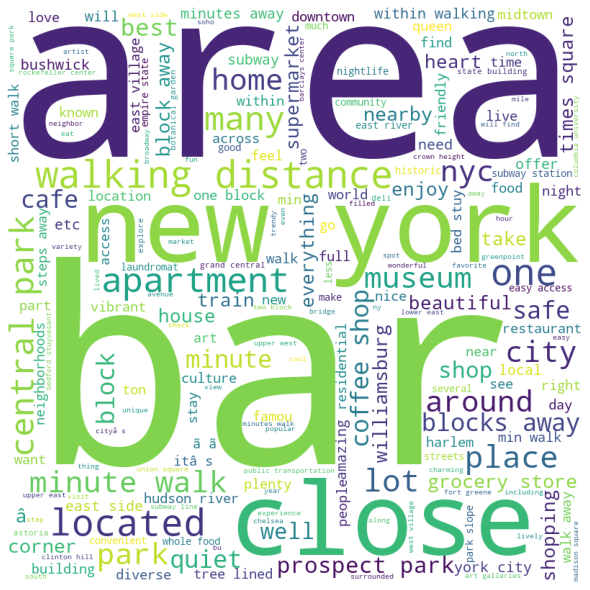

In [ ]:
# All data
# Python program to generate WordCloud
 
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
comment_words = ''
stopwords = set(STOPWORDS)
stopwords = set(STOPWORDS)
stopwords.add('br')
stopwords.add('b')
stopwords.add('nan')
stopwords.add('neighborhood')
stopwords.add('manhattan')
stopwords.add('brooklyn')
stopwords.add('restaurants')
stopwords.add('great')
stopwords.add('street')
 
# iterate through the csv file
for val in merge_table_df_and_rfm['neighborhood_overview']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
# df_listings['neighbourhood_group'].unique()

In [ ]:
top_listing = merge_table_df_and_rfm[merge_table_df_and_rfm['listings_segment'] == 'Top Listings']

In [ ]:
manhattan = merge_table_df_and_rfm[merge_table_df_and_rfm['neighbourhood_group'] == 'Manhattan']
brooklyn = merge_table_df_and_rfm[merge_table_df_and_rfm['neighbourhood_group'] == 'Brooklyn']
bronx = merge_table_df_and_rfm[merge_table_df_and_rfm['neighbourhood_group'] == 'Bronx']
staten_islan = merge_table_df_and_rfm[merge_table_df_and_rfm['neighbourhood_group'] == 'Staten Island']
queens = merge_table_df_and_rfm[merge_table_df_and_rfm['neighbourhood_group'] == 'Queens']

In [ ]:
top_listing

id  Recency  Frequency  Monetary  R_rank_norm  F_rank_norm  \
3          5178       26        536     36448        70.90        99.90   
6          5803       17        211     24898        77.96        97.41   
7          6848      104        184     15456        56.13        96.47   
8          6990       25        238     14756        71.40        98.12   
10         7097       14        294     58506        81.79        99.08   
...         ...      ...        ...       ...          ...          ...   
24294  51960731        3        104      8112        98.42        90.40   
24495  52155173        7        209     40337        89.99        97.33   
25234  52795626       15        291    121056        80.42        99.05   
26570  53843545        4        199     73033        96.87        97.01   
26938  54160208        2        136     21488        99.36        93.62   

       M_rank_norm  RFM_Score_Total listings_segment  \
3            99.90             4.78     Top Listings   
6            97.41             4.72     Top Listings   
7            96.47             4.52     Top Listings   
8            98.12             4.71     Top Listings   
10           99.08             4.82     Top Listings   
...            ...              ...              ...   
24294        90.40             4.58     Top Listings   
24495        97.33             4.81     Top Listings   
25234        99.05             4.81     Top Listings   
26570        97.01             4.85     Top Listings   
26938        93.62             4.72     Top Listings   

                                                    name  \
3                        Large Furnished Room Near B'way   
6      Lovely Room 1 in BEST AREA; Legal Rental, Spot...   
7                       Only 2 stops to Manhattan studio   
8                                UES Beautiful Blue Room   
10           Perfect for Your Parents:  Privacy + Garden   
...                                                  ...   
24294       Newly Renovated 2- Bedroom Rental. Amazing !   
24495  A modern Brooklyn dontown hotel near Sunset Park.   
25234  Studio Plus Apartment |  Placemakr Wall Street...   
26570                   Skyline views in Lower Manhattan   
26938         1-Bedroom with 1 King Bed by Lotus Blu Inn   

                                             description  \
3      Please don’t expect the luxury here just a bas...   
6      Beautiful house, gorgeous garden, large patio,...   
7      Comfortable studio apartment with super comfor...   
8      Parents/grandparents coming to town, or just h...   
10     HELLO.  PLEASE DO NOT HIT "REQUEST TO BOOK". H...   
...                                                  ...   
24294  Beautiful, newly renovated apartment in the he...   
24495  One stop to Manhattan. Minutes to Wall Street....   
25234  This special place is close to everything, mak...   
26570  A Private Bedroom & Full-Size Bed in a brand n...   
26938  Enjoy a stylish experience at this centrally-l...   

                                   neighborhood_overview    host_id  \
3        Theater district, many restaurants around here.       8967   
6      Neighborhood is amazing!<br />Best subways to ...       9744   
7                                                    NaN      15991   
8      Residential, village-like atmosphere. Lots of ...      16800   
10     Quiet residential block near many restaurants ...      17571   
...                                                  ...        ...   
24294  Close to the nightlife in Astoria! Also close ...  420837401   
24495                                                NaN  422234306   
25234                                                NaN  420415528   
26570                                                NaN  435369966   
26938                                                NaN  421049041   

                   host_name  host_response_time host_response_rate  \
3                   Shunichi        within a day               100%   
6 

## Check only in top listings

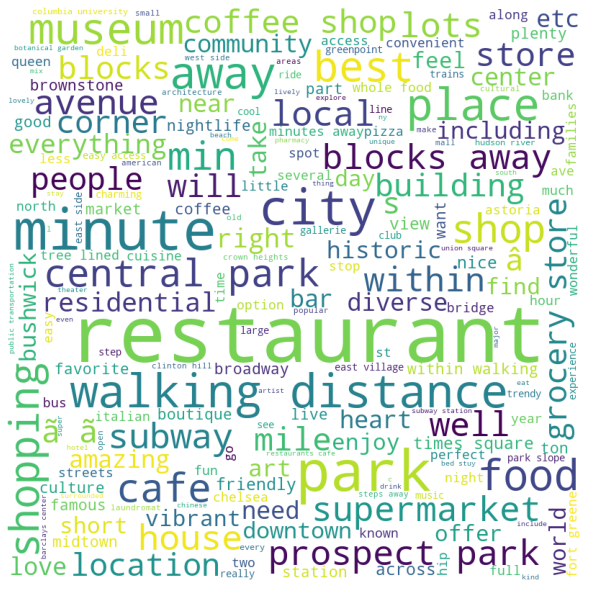

In [ ]:
# Top listings
# Python program to generate WordCloud
 
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
comment_words = ''
stopwords = set(STOPWORDS)
stopwords.update(['br', 'b', 'nan', 'nan', 'neighborhood', 'manhattan', 'brooklyn', 'great',
                  'street', 'area', 'apartment', 'many', 'close' , 'beautiful', 'new', 'york',
                  'located', 'nearby', 'williamsburg', 'harlem', 'nyc', 'neighborhoods', 'home',
                  'bars', 'train', 'quiet', 'one', 'around', 'safe', 'lot', 'block', ])

 
# iterate through the csv file
for val in top_listing['neighborhood_overview']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## Check based on neighbourhood

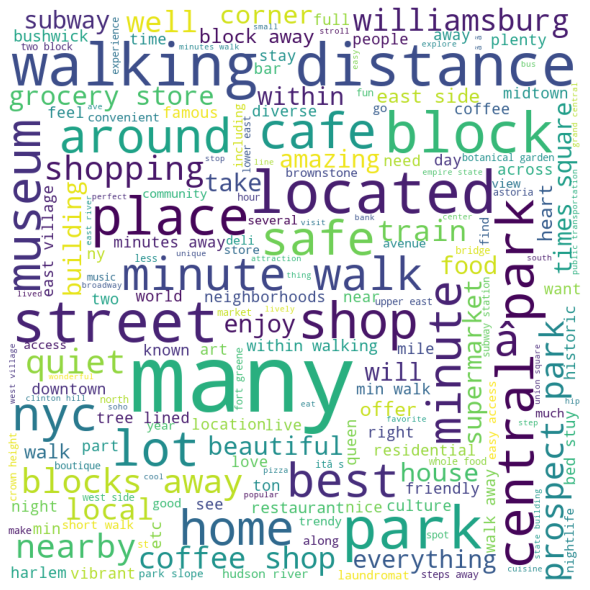

In [ ]:
# Manhattan
# Python program to generate WordCloud
 
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
comment_words = ''
stopwords = set(STOPWORDS)
stopwords.add('br')
stopwords.add('b')
stopwords.add('nan')
stopwords.add('neighborhood')
stopwords.add('new york')
stopwords.add('brooklyn')
stopwords.add('apartment')
stopwords.add('manhattan')
stopwords.add('restaurants')
stopwords.add('area')
stopwords.add('close')
stopwords.add('new')
stopwords.add('york')
stopwords.add('city')
stopwords.add('bars')
stopwords.add('one')
stopwords.add('great')


 
# iterate through the csv file
for val in manhattan['neighborhood_overview']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
# Brooklyn
# Python program to generate WordCloud
 
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
comment_words = ''
stopwords = set(STOPWORDS)
stopwords.add('br')
stopwords.add('b')
stopwords.add('nan')
stopwords.add('neighborhood')
stopwords.add('new york')
stopwords.add('brooklyn')
stopwords.add('apartment')
stopwords.add('manhattan')
stopwords.add('restaurants')
stopwords.add('area')
stopwords.add('close')
stopwords.add('new')
stopwords.add('york')
stopwords.add('city')
stopwords.add('bars')
stopwords.add('one')
stopwords.add('great')
stopwords.add('many')


# iterate through the csv file
for val in brooklyn['neighborhood_overview']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
# Bronx
# Python program to generate WordCloud
 
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in bronx['name']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
# Staten Island
# Python program to generate WordCloud
 
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in staten_islan['name']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
# Queens
# Python program to generate WordCloud
 
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in queens['name']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

Are there any influence of Covid-19 to Airbnb listings occupancy rate in NYC?

In [ ]:
# # filter > 2020
# df_2020 = df_reviews[df_reviews['date'] >= '2020-01-01']

In [ ]:
# df_2020

In [ ]:
# df_covid_2020

In [ ]:
# # group review all_data
# df_reviews['month_year'] = df_reviews['date'].dt.strftime('%Y-%m')
# df_reviews['month'] = df_reviews['date'].dt.strftime('%B')

# # sort month values
# df_reviews['month'] = pd.Categorical(df_reviews['month'], 
#     categories=['January','February','March','April','May','June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)

# # groupby
# df_reviews_month_year = df_reviews.groupby('month_year')['listing_id'].count().reset_index().sort_values(by='month_year')
# df_reviews_month = df_reviews.groupby('month')['listing_id'].count().reset_index().sort_values(by='month')

# # group review filtered data
# df_2020['covid'] = df_2020['date'].dt.strftime('%Y-%m')
# df_covid_2020['covid'] = df_covid_2020['date'].dt.strftime('%Y-%m')

# # groupby
# df_2020 = df_2020.groupby('covid')['listing_id'].count().reset_index().sort_values(by='covid')
# df_covid_2020 = df_covid_2020.groupby('covid')['new_cases'].sum().reset_index().sort_values(by='covid')



In [ ]:
# 

In [ ]:
# df_reviews_month

In [ ]:
# sns.set()

In [ ]:
# plt.figure(figsize=(50,10), dpi=200)
# plt.xticks(rotation=90)
# sns.lineplot(data=df_reviews_month_year, x='month_year', y='listing_id')

In [ ]:
# plt.figure(figsize=(50,10), dpi=200)
# plt.xticks(rotation=90)
# sns.lineplot(data=df_reviews_month, x='month', y='listing_id')

may highest occupancy
 
spring?

february lowest

winter?

is there any correlation with temperature data? multi subplot coba!!!

coba bandingkan dengan waktu libur (anak sekolah) di Amrik?

# K - Means

In [ ]:
df.drop(['index', 'bathrooms', 'bathrooms_cat'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_cluster = df.copy()
df_cluster

id    host_id  host_response_time host_is_superhost  \
0         77765     417504      within an hour                 t   
1         80684     417504  within a few hours                 f   
2         84010     417504  within a few hours                 f   
3        253846     417504      within an hour                 f   
4       3359510    7503643  Host not Answering                 f   
...         ...        ...                 ...               ...   
30611  24178848  182231443        within a day                 f   
30612  46038344   85724176      within an hour                 f   
30613  48228423   33614671      within an hour                 f   
30614  44189193  333993552      within an hour                 f   
30615   9170129   46973966  within a few hours                 f   

      neighbourhood_group        room_type  accommodates  bedrooms  beds  \
0                Brooklyn       Hotel room             4         1     2   
1                Brooklyn       Hotel room             2         1     2   
2                Brooklyn       Hotel room             4         3     3   
3                Brooklyn       Hotel room             2         1     1   
4                Brooklyn       Hotel room             2         1     1   
...                   ...              ...           ...       ...   ...   
30611           Manhattan  Entire home/apt             2         2     2   
30612           Manhattan  Entire home/apt             1         1     2   
30613           Manhattan  Entire home/apt             4         1     3   
30614           Manhattan  Entire home/apt             2         1     1   
30615           Manhattan  Entire home/apt             2         1     1   

       review_scores_value  price  minimum_nights  number_of_reviews  \
0                     4.85    250               3                 41   
1                     4.78    529               3                 10   
2                     4.58    210               3                 21   
3                     4.46    210               3                 22   
4                     5.00    139              30                 18   
...                    ...    ...             ...                ...   
30611                 0.00    259               4                  2   
30612                 0.00    270               3                  0   
30613                 0.00    250              30                  0   
30614                 0.00    250               3                 10   
30615                 0.00    189              30                129   

       calculated_host_listings_count  availability_365  bathrooms_num  
0                                  30               202            1.0  
1                                  30               164            1.0  
2                                  30               197            2.0  
3                                  30               195            1.0  
4                                  29               267            1.0  
...                               ...               ...            ...  
30611                               3               247            2.0  
30612                               2               355            2.0  
30613                               2               365            1.0  
30614                               1               125            1.0  
30615                               2               199            1.0  

[30072 rows x 16 columns]

In [ ]:
df_cluster = df_cluster.drop(['id','host_id'], axis=1)

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
dummies = pd.get_dummies(df_cluster)
dummies

accommodates  bedrooms  beds  review_scores_value  price  \
0                 4         1     2                 4.85    250   
1                 2         1     2                 4.78    529   
2                 4         3     3                 4.58    210   
3                 2         1     1                 4.46    210   
4                 2         1     1                 5.00    139   
...             ...       ...   ...                  ...    ...   
30611             2         2     2                 0.00    259   
30612             1         1     2                 0.00    270   
30613             4         1     3                 0.00    250   
30614             2         1     1                 0.00    250   
30615             2         1     1                 0.00    189   

       minimum_nights  number_of_reviews  calculated_host_listings_count  \
0                   3                 41                              30   
1                   3                 10                              30   
2                   3                 21                              30   
3                   3                 22                              30   
4                  30                 18                              29   
...               ...                ...                             ...   
30611               4                  2                               3   
30612               3                  0                               2   
30613              30                  0                               2   
30614               3                 10                               1   
30615              30                129                               2   

       availability_365  bathrooms_num  host_response_time_Host not Answering  \
0                   202            1.0                                      0   
1                   164            1.0                                      0   
2                   197            2.0                                      0   
3                   195            1.0                                      0   
4                   267            1.0                                      1   
...                 ...            ...                                    ...   
30611               247            2.0                                      0   
30612               355            2.0                                      0   
30613               365            1.0                                      0   
30614               125            1.0                                      0   
30615               199            1.0                                      0   

       host_response_time_a few days or more  host_response_time_within a day  \
0                                          0                                0   
1                                          0                                0   
2                                          0                                0   
3                                          0                                0   
4                                          0                                0   
...                                      ...                              ...   
30611                                      0                                1   
30612                                      0                                0   
30613                                      0                                0   
30614                                      0                                0   
30615                                      0                                0   

       host_response_time_within a few hours  \
0                                          0   
1                                          1   
2                                          1   
3                                          0   
4                                          0   
...                                      ...   
30611  

In [ ]:
# standardize the value 
scaler = StandardScaler()
dummies[dummies.columns] = scaler.fit_transform(dummies[dummies.columns])
dummies

accommodates  bedrooms      beds  review_scores_value     price  \
0          0.605874 -0.444803  0.362559             0.603678  1.024230   
1         -0.451882 -0.444803  0.362559             0.567685  3.571873   
2          0.605874  2.491130  1.270451             0.464848  0.658976   
3         -0.451882 -0.444803 -0.545333             0.403146  0.658976   
4         -0.451882 -0.444803 -0.545333             0.680806  0.010651   
...             ...       ...       ...                  ...       ...   
30611     -0.451882  1.023164  0.362559            -1.890120  1.106412   
30612     -0.980760 -0.444803  0.362559            -1.890120  1.206856   
30613      0.605874 -0.444803  1.270451            -1.890120  1.024230   
30614     -0.451882 -0.444803 -0.545333            -1.890120  1.024230   
30615     -0.451882 -0.444803 -0.545333            -1.890120  0.467218   

       minimum_nights  number_of_reviews  calculated_host_listings_count  \
0           -1.097241           0.193842                        0.436340   
1           -1.097241          -0.348886                        0.436340   
2           -1.097241          -0.156305                        0.436340   
3           -1.097241          -0.138798                        0.436340   
4            0.851296          -0.208827                        0.411832   
...               ...                ...                             ...   
30611       -1.025073          -0.488945                       -0.225391   
30612       -1.097241          -0.523960                       -0.249900   
30613        0.851296          -0.523960                       -0.249900   
30614       -1.097241          -0.348886                       -0.274409   
30615        0.851296           1.734489                       -0.249900   

       availability_365  bathrooms_num  host_response_time_Host not Answering  \
0              0.773857      -0.337807                              -0.811596   
1              0.473607      -0.337807                              -0.811596   
2              0.734350       1.934798                              -0.811596   
3              0.718548      -0.337807                              -0.811596   
4              1.287443      -0.337807                               1.232141   
...                 ...            ...                                    ...   
30611          1.129416       1.934798                              -0.811596   
30612          1.982759       1.934798                              -0.811596   
30613          2.061772      -0.337807                              -0.811596   
30614          0.165456      -0.337807                              -0.811596   
30615          0.750153      -0.337807                              -0.811596   

       host_response_time_a few days or more  host_response_time_within a day  \
0                                  -0.145924                        -0.309707   
1                                  -0.145924                        -0.309707   
2                                  -0.145924                        -0.309707   
3                                  -0.145924                        -0.309707   
4                                  -0.145924                        -0.309707   
...                                      ...                              ...   
30611                              -0.145924                         3.228859   
30612                              -0.145924                        -0.309707   
30613                              -0.145924                        -0.309707   
30614                              -0.145924                        -0.309707   
30615                              -0.145924                        -0.309707   

       host_response_time_within a few hours  \
0                                  -0.409855   
1                                   2.439890   
2                                   2.439890   
3                                  -0.409855   
4                  

## Silhoutte

For n_clusters = 2 The average silhouette_score is : 0.15823353390295675
For n_clusters = 3 The average silhouette_score is : 0.12621895480155615
For n_clusters = 4 The average silhouette_score is : 0.12938755579303246
For n_clusters = 5 The average silhouette_score is : 0.11196359965772068
For n_clusters = 6 The average silhouette_score is : 0.14663705335769822
For n_clusters = 7 The average silhouette_score is : 0.1498992169040374
For n_clusters = 8 The average silhouette_score is : 0.14205070423583147
For n_clusters = 9 The average silhouette_score is : 0.14001560556368847
For n_clusters = 10 The average silhouette_score is : 0.14731594186990918


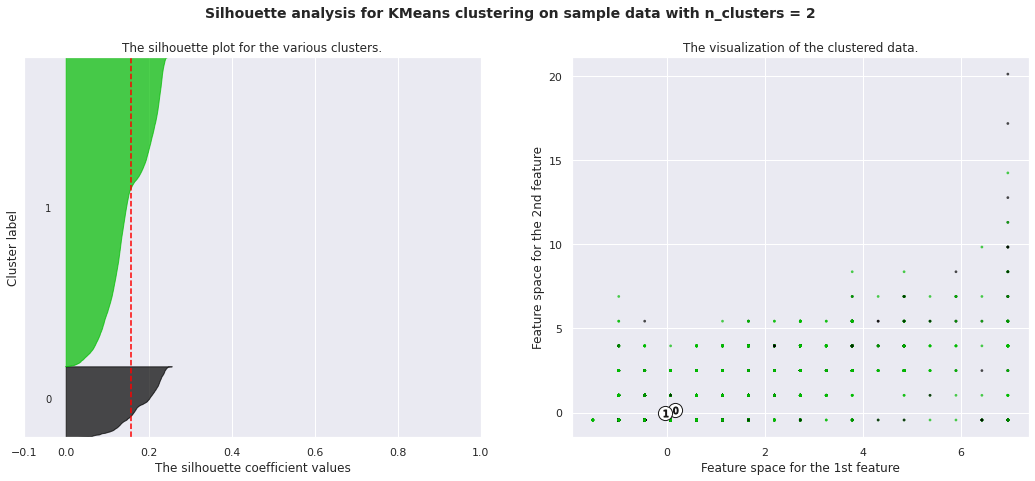

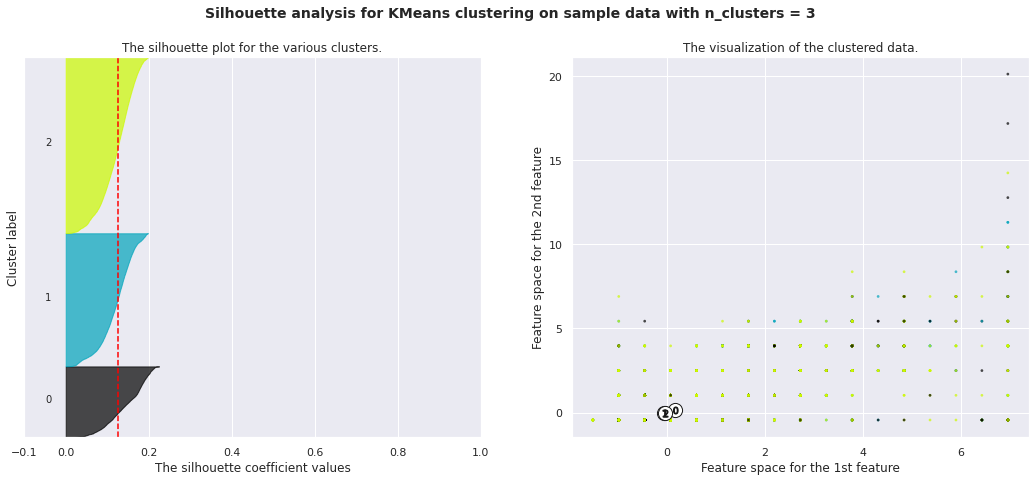

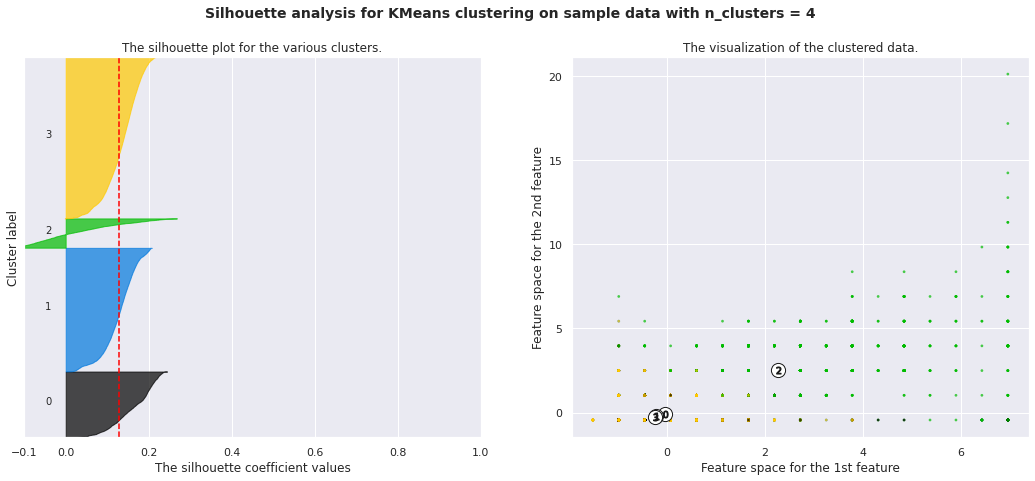

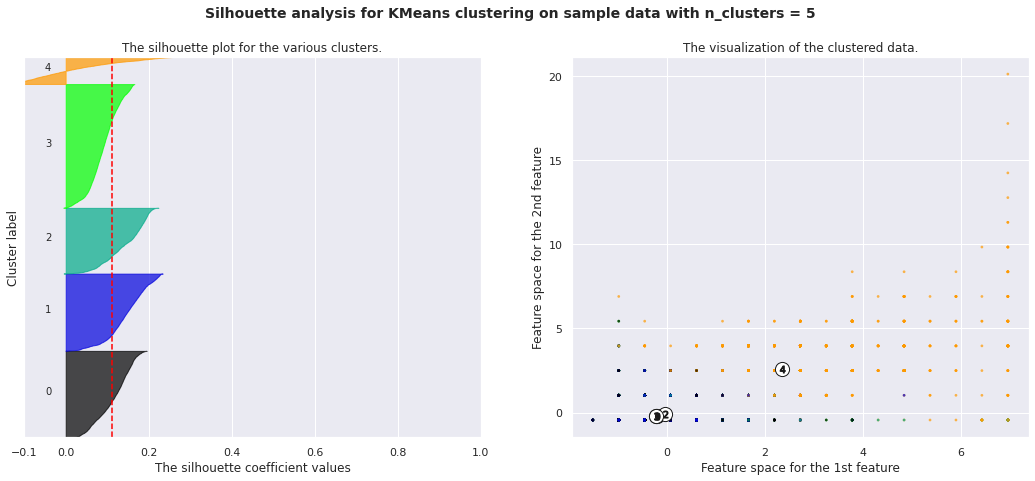

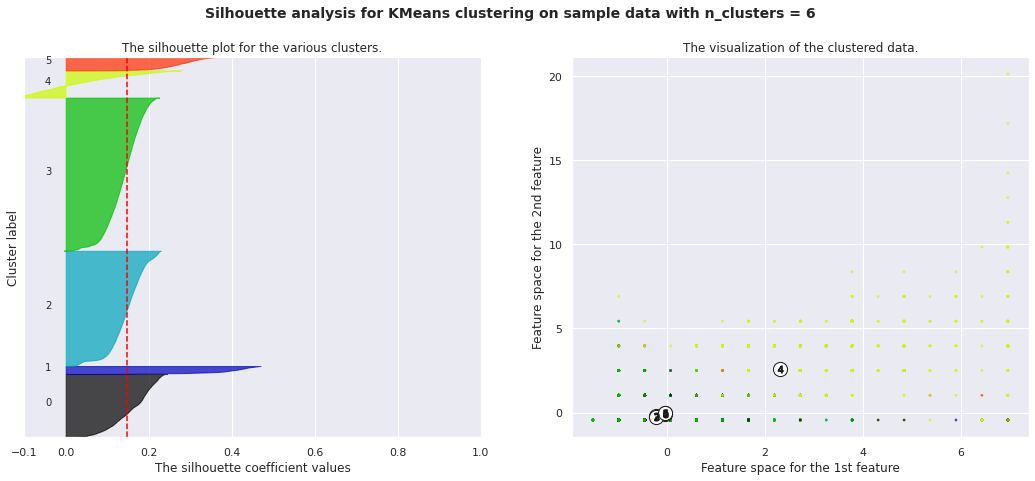

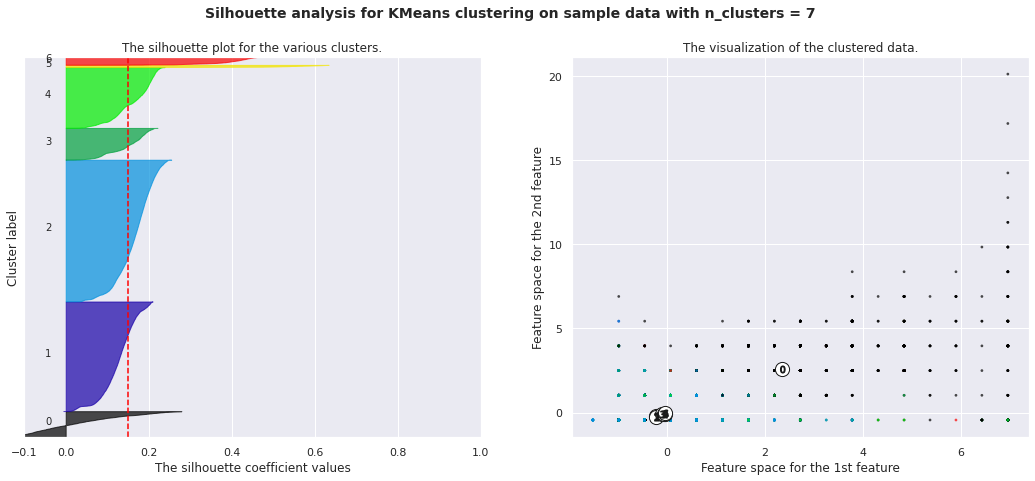

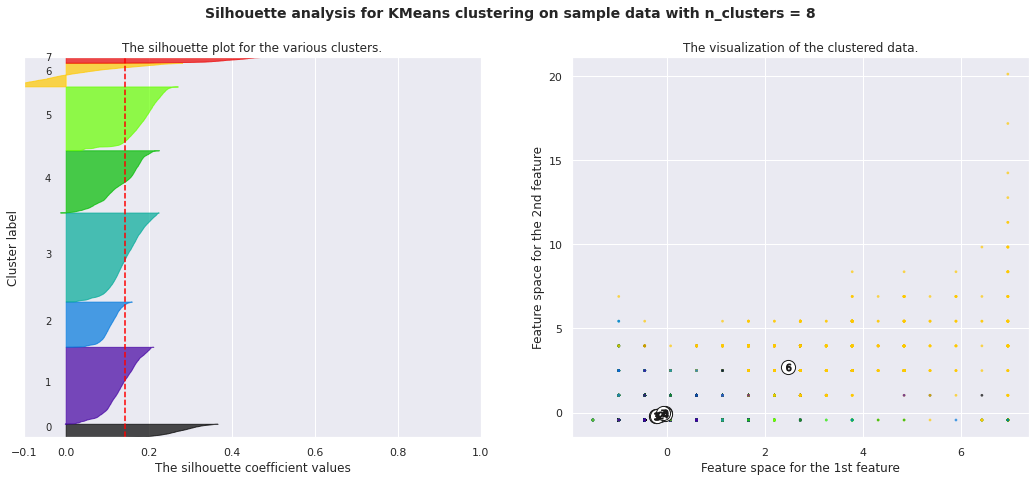

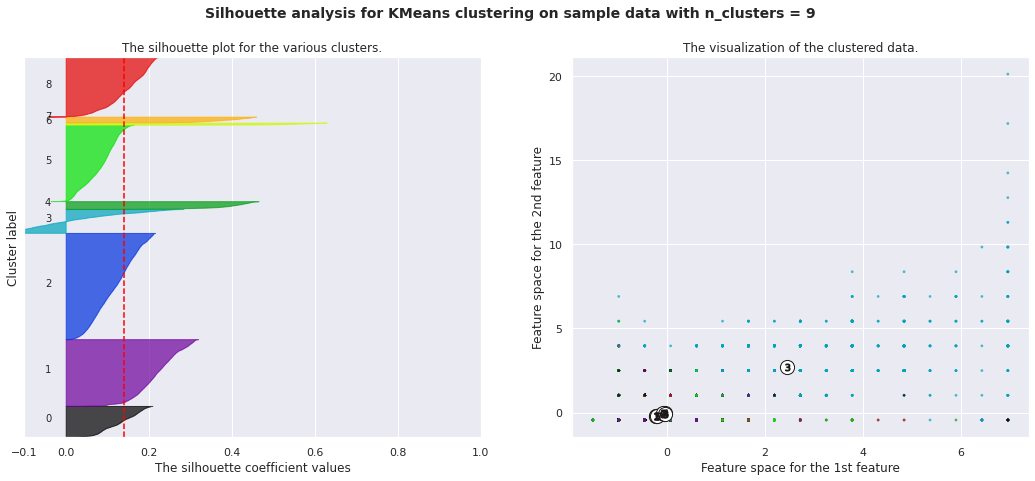

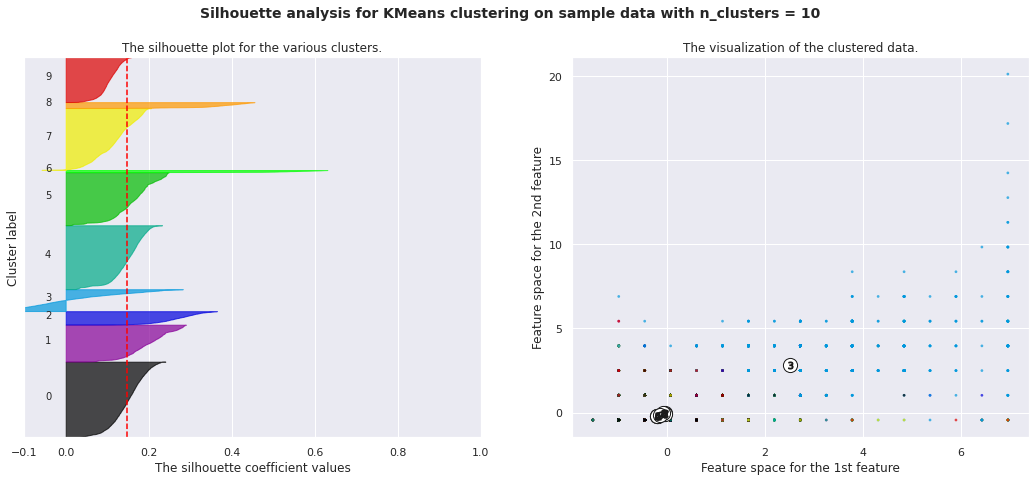

In [ ]:
from silhoutte import silhoutte_analysis
silhoutte_analysis(dummies,list(range(2,11)))

## Elbow

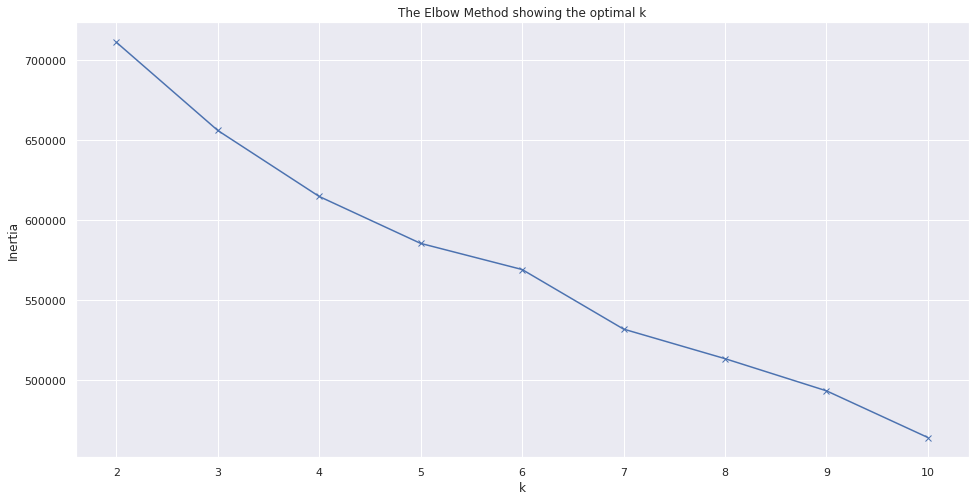

In [ ]:
distortions = []
K = range(2,11)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(dummies)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
cluster_model = cluster.KMeans(n_clusters=2)
cluster_model.fit(dummies)
cluster_label = cluster_model.labels_
dummies['cluster'] = cluster_label
dummies

accommodates  bedrooms      beds  review_scores_value     price  \
0          0.605874 -0.444803  0.362559             0.603678  1.024230   
1         -0.451882 -0.444803  0.362559             0.567685  3.571873   
2          0.605874  2.491130  1.270451             0.464848  0.658976   
3         -0.451882 -0.444803 -0.545333             0.403146  0.658976   
4         -0.451882 -0.444803 -0.545333             0.680806  0.010651   
...             ...       ...       ...                  ...       ...   
30611     -0.451882  1.023164  0.362559            -1.890120  1.106412   
30612     -0.980760 -0.444803  0.362559            -1.890120  1.206856   
30613      0.605874 -0.444803  1.270451            -1.890120  1.024230   
30614     -0.451882 -0.444803 -0.545333            -1.890120  1.024230   
30615     -0.451882 -0.444803 -0.545333            -1.890120  0.467218   

       minimum_nights  number_of_reviews  calculated_host_listings_count  \
0           -1.097241           0.193842                        0.436340   
1           -1.097241          -0.348886                        0.436340   
2           -1.097241          -0.156305                        0.436340   
3           -1.097241          -0.138798                        0.436340   
4            0.851296          -0.208827                        0.411832   
...               ...                ...                             ...   
30611       -1.025073          -0.488945                       -0.225391   
30612       -1.097241          -0.523960                       -0.249900   
30613        0.851296          -0.523960                       -0.249900   
30614       -1.097241          -0.348886                       -0.274409   
30615        0.851296           1.734489                       -0.249900   

       availability_365  bathrooms_num  host_response_time_Host not Answering  \
0              0.773857      -0.337807                              -0.811596   
1              0.473607      -0.337807                              -0.811596   
2              0.734350       1.934798                              -0.811596   
3              0.718548      -0.337807                              -0.811596   
4              1.287443      -0.337807                               1.232141   
...                 ...            ...                                    ...   
30611          1.129416       1.934798                              -0.811596   
30612          1.982759       1.934798                              -0.811596   
30613          2.061772      -0.337807                              -0.811596   
30614          0.165456      -0.337807                              -0.811596   
30615          0.750153      -0.337807                              -0.811596   

       host_response_time_a few days or more  host_response_time_within a day  \
0                                  -0.145924                        -0.309707   
1                                  -0.145924                        -0.309707   
2                                  -0.145924                        -0.309707   
3                                  -0.145924                        -0.309707   
4                                  -0.145924                        -0.309707   
...                                      ...                              ...   
30611                              -0.145924                         3.228859   
30612                              -0.145924                        -0.309707   
30613                              -0.145924                        -0.309707   
30614                              -0.145924                        -0.309707   
30615                              -0.145924                        -0.309707   

       host_response_time_within a few hours  \
0                                  -0.409855   
1                                   2.439890   
2                                   2.439890   
3                                  -0.409855   
4                  

In [ ]:
df_cluster['cluster'] = cluster_label

In [ ]:
df_cluster

host_response_time host_is_superhost neighbourhood_group  \
0          within an hour                 t            Brooklyn   
1      within a few hours                 f            Brooklyn   
2      within a few hours                 f            Brooklyn   
3          within an hour                 f            Brooklyn   
4      Host not Answering                 f            Brooklyn   
...                   ...               ...                 ...   
30611        within a day                 f           Manhattan   
30612      within an hour                 f           Manhattan   
30613      within an hour                 f           Manhattan   
30614      within an hour                 f           Manhattan   
30615  within a few hours                 f           Manhattan   

             room_type  accommodates  bedrooms  beds  review_scores_value  \
0           Hotel room             4         1     2                 4.85   
1           Hotel room             2         1     2                 4.78   
2           Hotel room             4         3     3                 4.58   
3           Hotel room             2         1     1                 4.46   
4           Hotel room             2         1     1                 5.00   
...                ...           ...       ...   ...                  ...   
30611  Entire home/apt             2         2     2                 0.00   
30612  Entire home/apt             1         1     2                 0.00   
30613  Entire home/apt             4         1     3                 0.00   
30614  Entire home/apt             2         1     1                 0.00   
30615  Entire home/apt             2         1     1                 0.00   

       price  minimum_nights  number_of_reviews  \
0        250               3                 41   
1        529               3                 10   
2        210               3                 21   
3        210               3                 22   
4        139              30                 18   
...      ...             ...                ...   
30611    259               4                  2   
30612    270               3                  0   
30613    250              30                  0   
30614    250               3                 10   
30615    189              30                129   

       calculated_host_listings_count  availability_365  bathrooms_num  \
0                                  30               202            1.0   
1                                  30               164            1.0   
2                                  30               197            2.0   
3                                  30               195            1.0   
4                                  29               267            1.0   
...                               ...               ...            ...   
30611                               3               247            2.0   
30612                               2               355            2.0   
30613                               2               365            1.0   
30614                               1               125            1.0   
30615                               2               199            1.0   

       cluster  
0            1  
1            0  
2            0  
3            0  
4            0  
...        ...  
30611        0  
30612        0  
30613        0  
30614        0  
30615        0  

[30072 rows x 15 columns]

In [ ]:
df_cluster.groupby(['cluster','host_response_time', 'host_is_superhost'])['bathrooms_num'].agg(['count', 'mean']).sort_values(by=['cluster','count'], ascending=False)

count      mean
cluster host_response_time host_is_superhost                 
1       within an hour     t                   3989  1.157934
        within a few hours t                   1115  1.182960
        within a day       t                    379  1.135884
        Host not Answering t                    105  1.066667
        a few days or more t                     11  1.272727
        within an hour     f                      7  6.928571
0       Host not Answering f                  11837  1.114429
        within an hour     f                   6550  1.172977
        within a few hours f                   3210  1.167290
        within a day       f                   2253  1.184865
        a few days or more f                    616  1.149351

## Summary

Cluster characteristic

1: 
- a type of listings avoided by customers, because host usually not answering
- host is not superhost
- review_scores_value = 3.46 ~ 3.5
- average price is 137
- accomodates = 2.78 ~ 3
- bedrooms = 1.28 ~ 1
- beds = 1.55 ~ 2
- number_of_reviews = 30.02 ~ 30
- calculated_host_listings_count = 11.69 ~ 12
- availability_365 = 102.60 ~ 103
- bathrooms_num = 1.14 ~ 1

0: 
- a fast response host, reply the chat within an hour
- host is superhost
- review_scores_value = 4.6 ~ 5
- average price is not different, 138
- accomodates = 3.1 ~ 3
- bedrooms = 1.39 ~ 1
- beds = 1.81 ~ 2
- number_of_reviews = 29.50 ~ 30
- calculated_host_listings_count = 14.40 ~ 14
- availability_365 = 110.39 ~ 110
- bathrooms_num = 1.16 ~ 1


## What Next

- Selanjutnya, ditunjukin dimana lokasi2 yang jadi favorit customer di peta
- analisis selanjutnya coba pake RFM dengan kolom last review?

### Summary K-MEANS

Cluster characteristic K-MEANS

1: 24466 = 81%
- a type of listings avoided by customers, because host usually not answering
- host is not superhost
- review_scores_value = 3.46 ~ 3.5
- average price is 137
- accomodates = 2.78 ~ 3
- bedrooms = 1.28 ~ 1
- beds = 1.55 ~ 2
- number_of_reviews = 30.02 ~ 30
- calculated_host_listings_count = 11.69 ~ 12
- availability_365 = 102.60 ~ 103
- bathrooms_num = 1.14 ~ 1

0: 5605 = 19%
- a fast response host, reply the chat within an hour
- host is superhost
- review_scores_value = 4.6 ~ 5
- average price is not different, 138
- accomodates = 3.1 ~ 3
- bedrooms = 1.39 ~ 1
- beds = 1.81 ~ 2
- number_of_reviews = 29.50 ~ 30
- calculated_host_listings_count = 14.40 ~ 14
- availability_365 = 110.39 ~ 110
- bathrooms_num = 1.16 ~ 1


# Correlation Chart

In [ ]:
dummies = pd.get_dummies(df)
dummies

In [ ]:
df.corr()

In [ ]:
dummies.corr()

In [ ]:
plt.figure(figsize=(24, 10))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [ ]:
plt.figure(figsize=(36, 15))
mask = np.triu(np.ones_like(dummies.corr(), dtype=np.bool))
heatmap = sns.heatmap(dummies.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [ ]:
dummies.info()

In [ ]:
dummies = dummies.drop(['index','id','host_id'],axis = 1)

In [ ]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize =(15,3)) 
ax1.scatter(df['minimum_nights'],df['price'])
ax1.set_title('Price and minimum_nights')
ax2.scatter(df['number_of_reviews'],df['price'])
ax2.set_title('Price and number_of_reviews')
ax3.scatter(df['accommodates'],df['price'])
ax3.set_title('Price and availability_365')
ax4.scatter(df['bedrooms'],df['price'])
ax4.set_title('Price and calculated_host_listings_count')

plt.show()


# Regression

In [ ]:
df.describe(include='all')

Dropping unnecessary for dummies : Index, ID, neigh overview,host_id

In [ ]:
df1 = df.drop(['index','id','neighborhood_overview','host_id'],axis=1)
df1

In [ ]:
df1['bathrooms'].unique()

In [ ]:
df1['bathrooms_num'] = df1['bathrooms'].replace(to_replace={'Shared' : '0', 'Half-bath' : '0.5', 'Private' : '1'})
df1['bathrooms_num'] = df1['bathrooms_num'].astype(float)

In [ ]:
df1['bathrooms_cat'] = df1['bathrooms'].replace(to_replace=[1, '1', '2', '1.5', '2.5', '3', '3.5', '4', 'Half-bath',
                                                                      '4.5', '5.5', '3.5', '15.5', '5', '4', '6', '15', '7.5', 
                                                                      '6.5', '7', '8'], value='Private')
df1['bathrooms_cat'] = df1['bathrooms_cat'].replace(to_replace='0', value='Shared')

In [ ]:
df1.info()

In [ ]:
df1 = df.drop(['index','id','host_id','neighborhood_overview','bathrooms','minimum_nights'],axis=1)

In [ ]:
df1.describe(include='all')

In [ ]:
df2 = pd.get_dummies(df1)
df2

In [ ]:
y= df2['review_scores_value']
x1 = df2.drop('review_scores_value',axis=1)

In [ ]:
df2.corr()

In [ ]:
plt.figure(figsize=(36, 15))
mask = np.triu(np.ones_like(df2.corr(), dtype=np.bool))
heatmap = sns.heatmap(df2.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [ ]:
df2.info()